# **Diabetes Prediction**

Import required libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Machine learning libary
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# **Obtain**

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. dataset link: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [ ]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

Below are the definition for each column attributes:

Note: for binary data, 0 = No, 1 = Yes.

* `Diabetes_binary` - you have diabetes (0,1).
* `High BP` -  Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1).
* `HighChol` - Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1).
* `CholCheck` -  Cholesterol check within past five years (0,1).
* `BMI` - Body Mass Index (BMI).
* `Smoker` - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes].
* `Stroke` -  (Ever told) you had a stroke. (0,1).
* `HeartDiseaseorAttack` - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1).
* `PhysActivity` -  Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1).
* `Fruits` - Consume Fruit 1 or more times per day (0,1).
* `Veggies` - Consume Vegetables 1 or more times per day (0,1).
* `HvyAlcoholConsump` - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1).
* `AnyHealthcare` - Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1).
* `NoDocbcCost` -  Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1).
* `GenHlth` -  Would you say that in general your health is: rate (1 ~ 5) [1=Poor, 2=Fair, 3=Good, 4=Very Good, 5=Excellent].
* `MenHlth` - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30).
* `PhysHlth` - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30).
* `DiffWalk ` - Do you have serious difficulty walking or climbing stairs? (0,1)
* `Sex` -  Indicate sex of respondent (0,1) (Female or Male).
* `Age` -  Fourteen-level age category (1 ~ 13) [1=18 to 24, 2=25 to 29, 3=30 to 34, 4=35 to 39, 5=40 to 44, 6=45 to 49, 7=50 to 54, 8=55 to 59, 9=60 to 64, 10=65 to 69, 11=70 to 74, 12=75 to 79, 13=80 or older].
* `Education` - What is the highest grade or year of school you completed? (1 ~ 6) [1=Never Attended School, 2=Elementary, 3=Some High School, 4=High School Graduate, 5=Some College, 6=College Graduate].
* `Income ` - Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8) [1-4=Less Than 10,000 USD, 5-7=Less Than 35,000 USD, 8=75,000 USD or More].


# **Scrub**

## **Information of dataset**

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.shape

(253680, 22)

Dataset contained 253680 rows and 22 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Data type for all the data in the dataset is float64.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Data from BMI, MentHlth and PhysHlth may have outliers due to big difference between maximum value and 3rd quartile value.

### **Transformation of data type**

In [ ]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

Changing all the data type from float64 to integer64.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

## **Check missing data**

In [ ]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
data.isnull().sum().any()

False

No missing data is found.

## **Check duplicated data**

In [ ]:
duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1,1,1,1,27,1,0,0,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8


There are 24206 duplicated data.

## **Remove duplicated data**

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.shape

(229474, 22)

After remove duplicated data, the dataset now contained 229474 rows and 22 columns.

## **Check unique value for each variables**

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


## **Display value counts for all data**

In [ ]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data)

0    194377
1     35097
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    125214
1    104260
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    128129
1    101345
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    220176
0      9298
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    21514
26    17775
24    16497
28    14914
25    14793
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    122585
1    106889
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    219190
1     10284
Name: Stroke, dtype: int64
____________________________________________

## **Check outliers for non binary data**

There is no need to check outliers for binary data because of the data only have two value (binary).


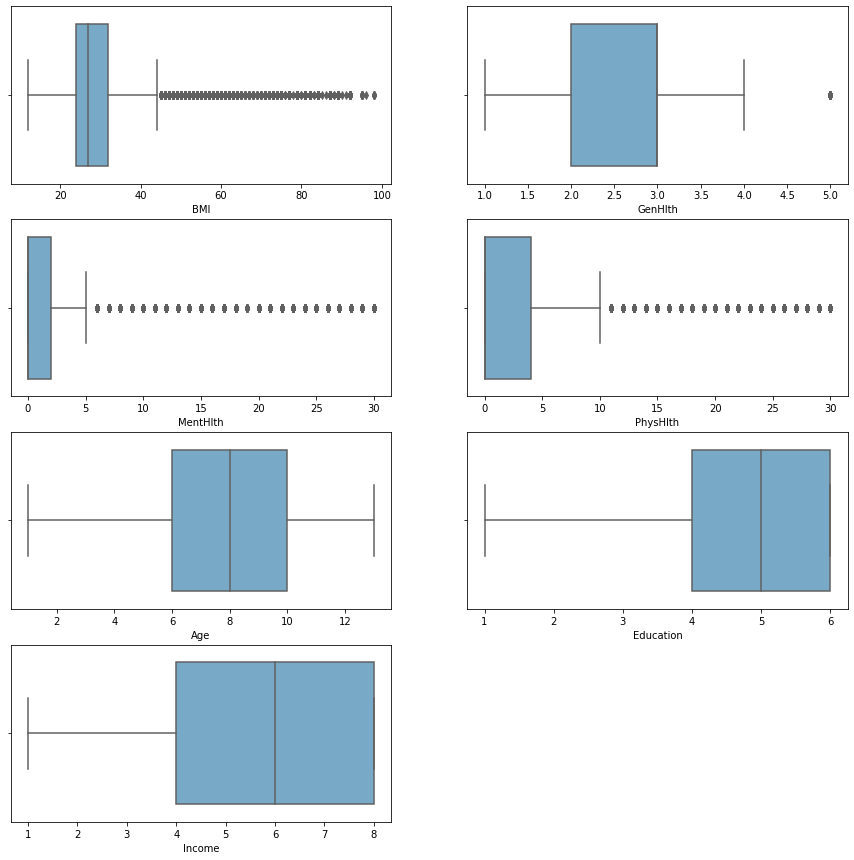

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Blues')
plt.show()

There are some outliers in the some variables such as BMI, GenHlth, MentHlth and PhysHlth. However, the outliers in the data will not be removed. For example, some outliers in BMI is greater than 45 but BMI over 45 is possible because of severe morbid obesity could lead to BMI over 50.

# **Exploratory Data Analysis**

## **Histogram of value count for each variables**

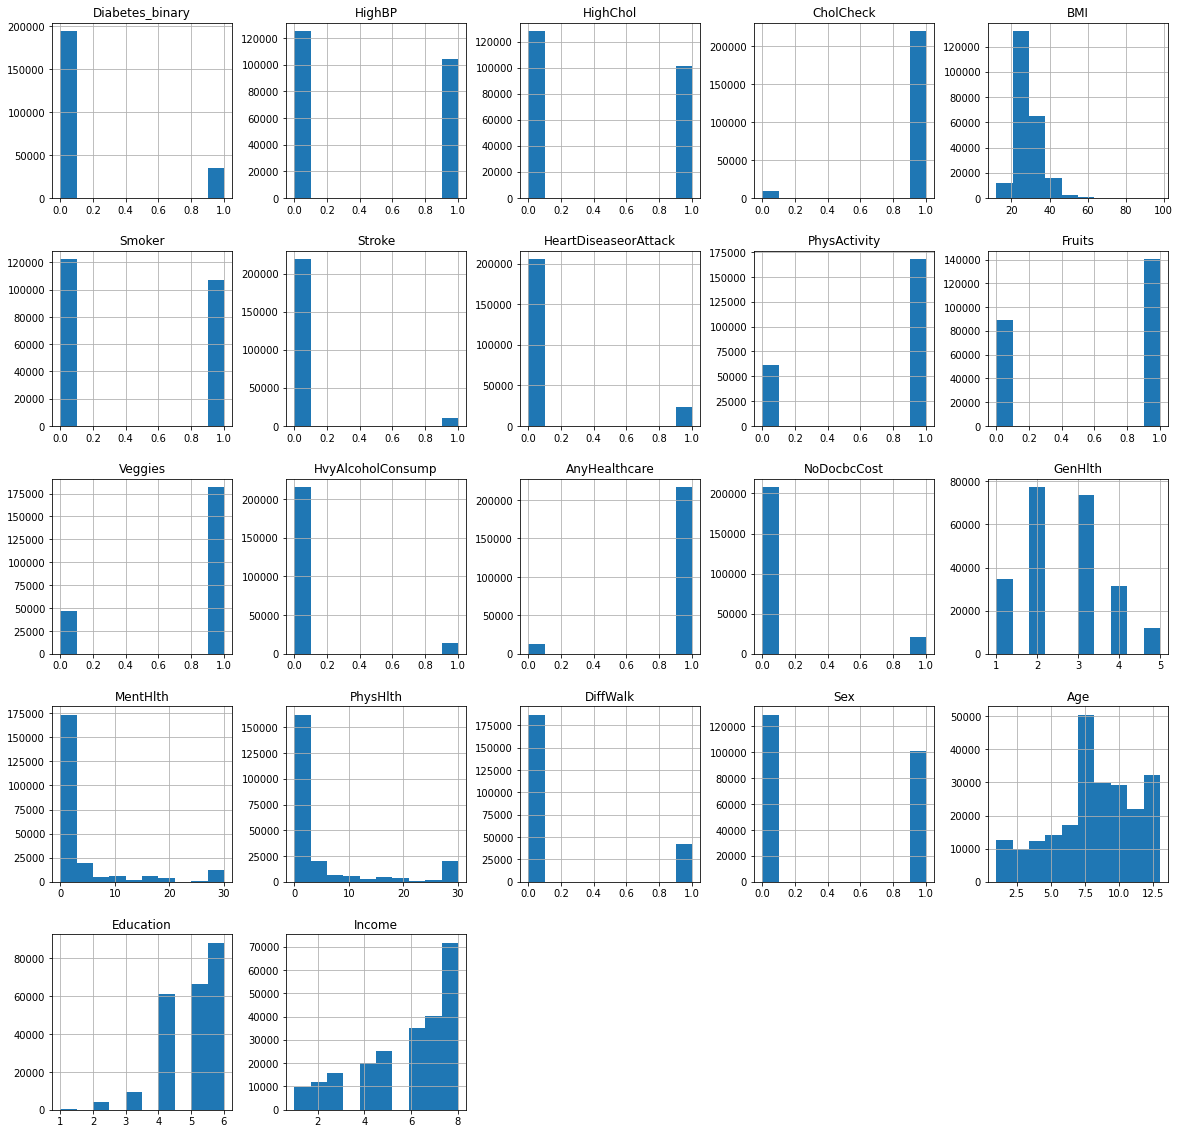

In [ ]:
data.hist(figsize = (20,20))
plt.show()

Using histogram to understand dataset data better

## **Data transformation to help visualisation**

In [ ]:
data_str = data.copy()

In [ ]:
data_str["Diabetes_binary_str"]= data_str["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

data_str.Age[data_str['Age'] == 1] = '18 to 24'
data_str.Age[data_str['Age'] == 2] = '25 to 29'
data_str.Age[data_str['Age'] == 3] = '30 to 34'
data_str.Age[data_str['Age'] == 4] = '35 to 39'
data_str.Age[data_str['Age'] == 5] = '40 to 44'
data_str.Age[data_str['Age'] == 6] = '45 to 49'
data_str.Age[data_str['Age'] == 7] = '50 to 54'
data_str.Age[data_str['Age'] == 8] = '55 to 59'
data_str.Age[data_str['Age'] == 9] = '60 to 64'
data_str.Age[data_str['Age'] == 10] = '65 to 69'
data_str.Age[data_str['Age'] == 11] = '70 to 74'
data_str.Age[data_str['Age'] == 12] = '75 to 79'
data_str.Age[data_str['Age'] == 13] = '80 or older'

data_str.Diabetes_binary[data_str['Diabetes_binary'] == 0] = 'No Diabetes'
data_str.Diabetes_binary[data_str['Diabetes_binary'] == 1] = 'Diabetes'

data_str.HighBP[data_str['HighBP'] == 0] = 'No High BP'
data_str.HighBP[data_str['HighBP'] == 1] = 'High BP'

data_str.HighChol[data_str['HighChol'] == 0] = 'No High Cholesterol'
data_str.HighChol[data_str['HighChol'] == 1] = 'High Cholesterol'

data_str.CholCheck[data_str['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data_str.CholCheck[data_str['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data_str.Smoker[data_str['Smoker'] == 0] = 'No'
data_str.Smoker[data_str['Smoker'] == 1] = 'Yes'

data_str.Stroke[data_str['Stroke'] == 0] = 'No'
data_str.Stroke[data_str['Stroke'] == 1] = 'Yes'

data_str.HeartDiseaseorAttack[data_str['HeartDiseaseorAttack'] == 0] = 'No'
data_str.HeartDiseaseorAttack[data_str['HeartDiseaseorAttack'] == 1] = 'Yes'

data_str.PhysActivity[data_str['PhysActivity'] == 0] = 'No'
data_str.PhysActivity[data_str['PhysActivity'] == 1] = 'Yes'

data_str.Fruits[data_str['Fruits'] == 0] = 'No'
data_str.Fruits[data_str['Fruits'] == 1] = 'Yes'

data_str.Veggies[data_str['Veggies'] == 0] = 'No'
data_str.Veggies[data_str['Veggies'] == 1] = 'Yes'

data_str.HvyAlcoholConsump[data_str['HvyAlcoholConsump'] == 0] = 'No'
data_str.HvyAlcoholConsump[data_str['HvyAlcoholConsump'] == 1] = 'Yes'

data_str.AnyHealthcare[data_str['AnyHealthcare'] == 0] = 'No'
data_str.AnyHealthcare[data_str['AnyHealthcare'] == 1] = 'Yes'

data_str.NoDocbcCost[data_str['NoDocbcCost'] == 0] = 'No'
data_str.NoDocbcCost[data_str['NoDocbcCost'] == 1] = 'Yes'

data_str.GenHlth[data_str['GenHlth'] == 5] = 'Excellent'
data_str.GenHlth[data_str['GenHlth'] == 4] = 'Very Good'
data_str.GenHlth[data_str['GenHlth'] == 3] = 'Good'
data_str.GenHlth[data_str['GenHlth'] == 2] = 'Fair'
data_str.GenHlth[data_str['GenHlth'] == 1] = 'Poor'

data_str.DiffWalk[data_str['DiffWalk'] == 0] = 'No'
data_str.DiffWalk[data_str['DiffWalk'] == 1] = 'Yes'

data_str.Sex[data_str['Sex'] == 0] = 'Female'
data_str.Sex[data_str['Sex'] == 1] = 'Male'

data_str.Education[data_str['Education'] == 1] = 'Never Attended School'
data_str.Education[data_str['Education'] == 2] = 'Elementary'
data_str.Education[data_str['Education'] == 3] = 'Some High School'
data_str.Education[data_str['Education'] == 4] = 'High School Graduate'
data_str.Education[data_str['Education'] == 5] = 'Some College'
data_str.Education[data_str['Education'] == 6] = 'College Graduate'

data_str.Income[data_str['Income'] == 1] = 'Less Than $10,000'
data_str.Income[data_str['Income'] == 2] = 'Less Than $10,000'
data_str.Income[data_str['Income'] == 3] = 'Less Than $10,000'
data_str.Income[data_str['Income'] == 4] = 'Less Than $10,000'
data_str.Income[data_str['Income'] == 5] = 'Less Than $35,000'
data_str.Income[data_str['Income'] == 6] = 'Less Than $35,000'
data_str.Income[data_str['Income'] == 7] = 'Less Than $35,000'
data_str.Income[data_str['Income'] == 8] = '$75,000 or More'

Data is transformed from numerical value to string value to help the visualisation.

## **Target Variables: Diabetes binary**

### **Count the number of diabetic person and non diabetic person**

In [ ]:
data_str["Diabetes_binary"].value_counts()

No Diabetes    194377
Diabetes        35097
Name: Diabetes_binary, dtype: int64

The dataset contained 194377 data of non-diabetic person and 35097 data of diabetic person.

### **Visualisation of value count and percentage of diabetic and non-diabetic person**

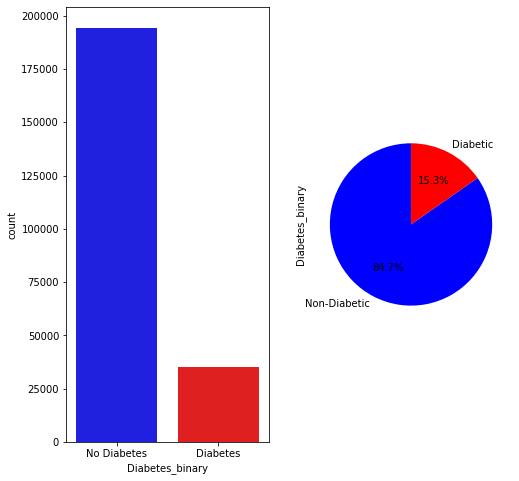

In [ ]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

sns.countplot(data_str['Diabetes_binary'],ax=ax1[0], palette=['Blue','Red'])

labels = ['Non-Diabetic','Diabetic']

data_str.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%', startangle=90, colors=['Blue','Red'])
fig1.show()

Percentage of diabetic person is 15.3% while percentage of non-diabetic person is 84.7%. Therefore, the dataset is imbalance.

### **Visualisation of relation between binary variables to the target variable(diabetes binary)**

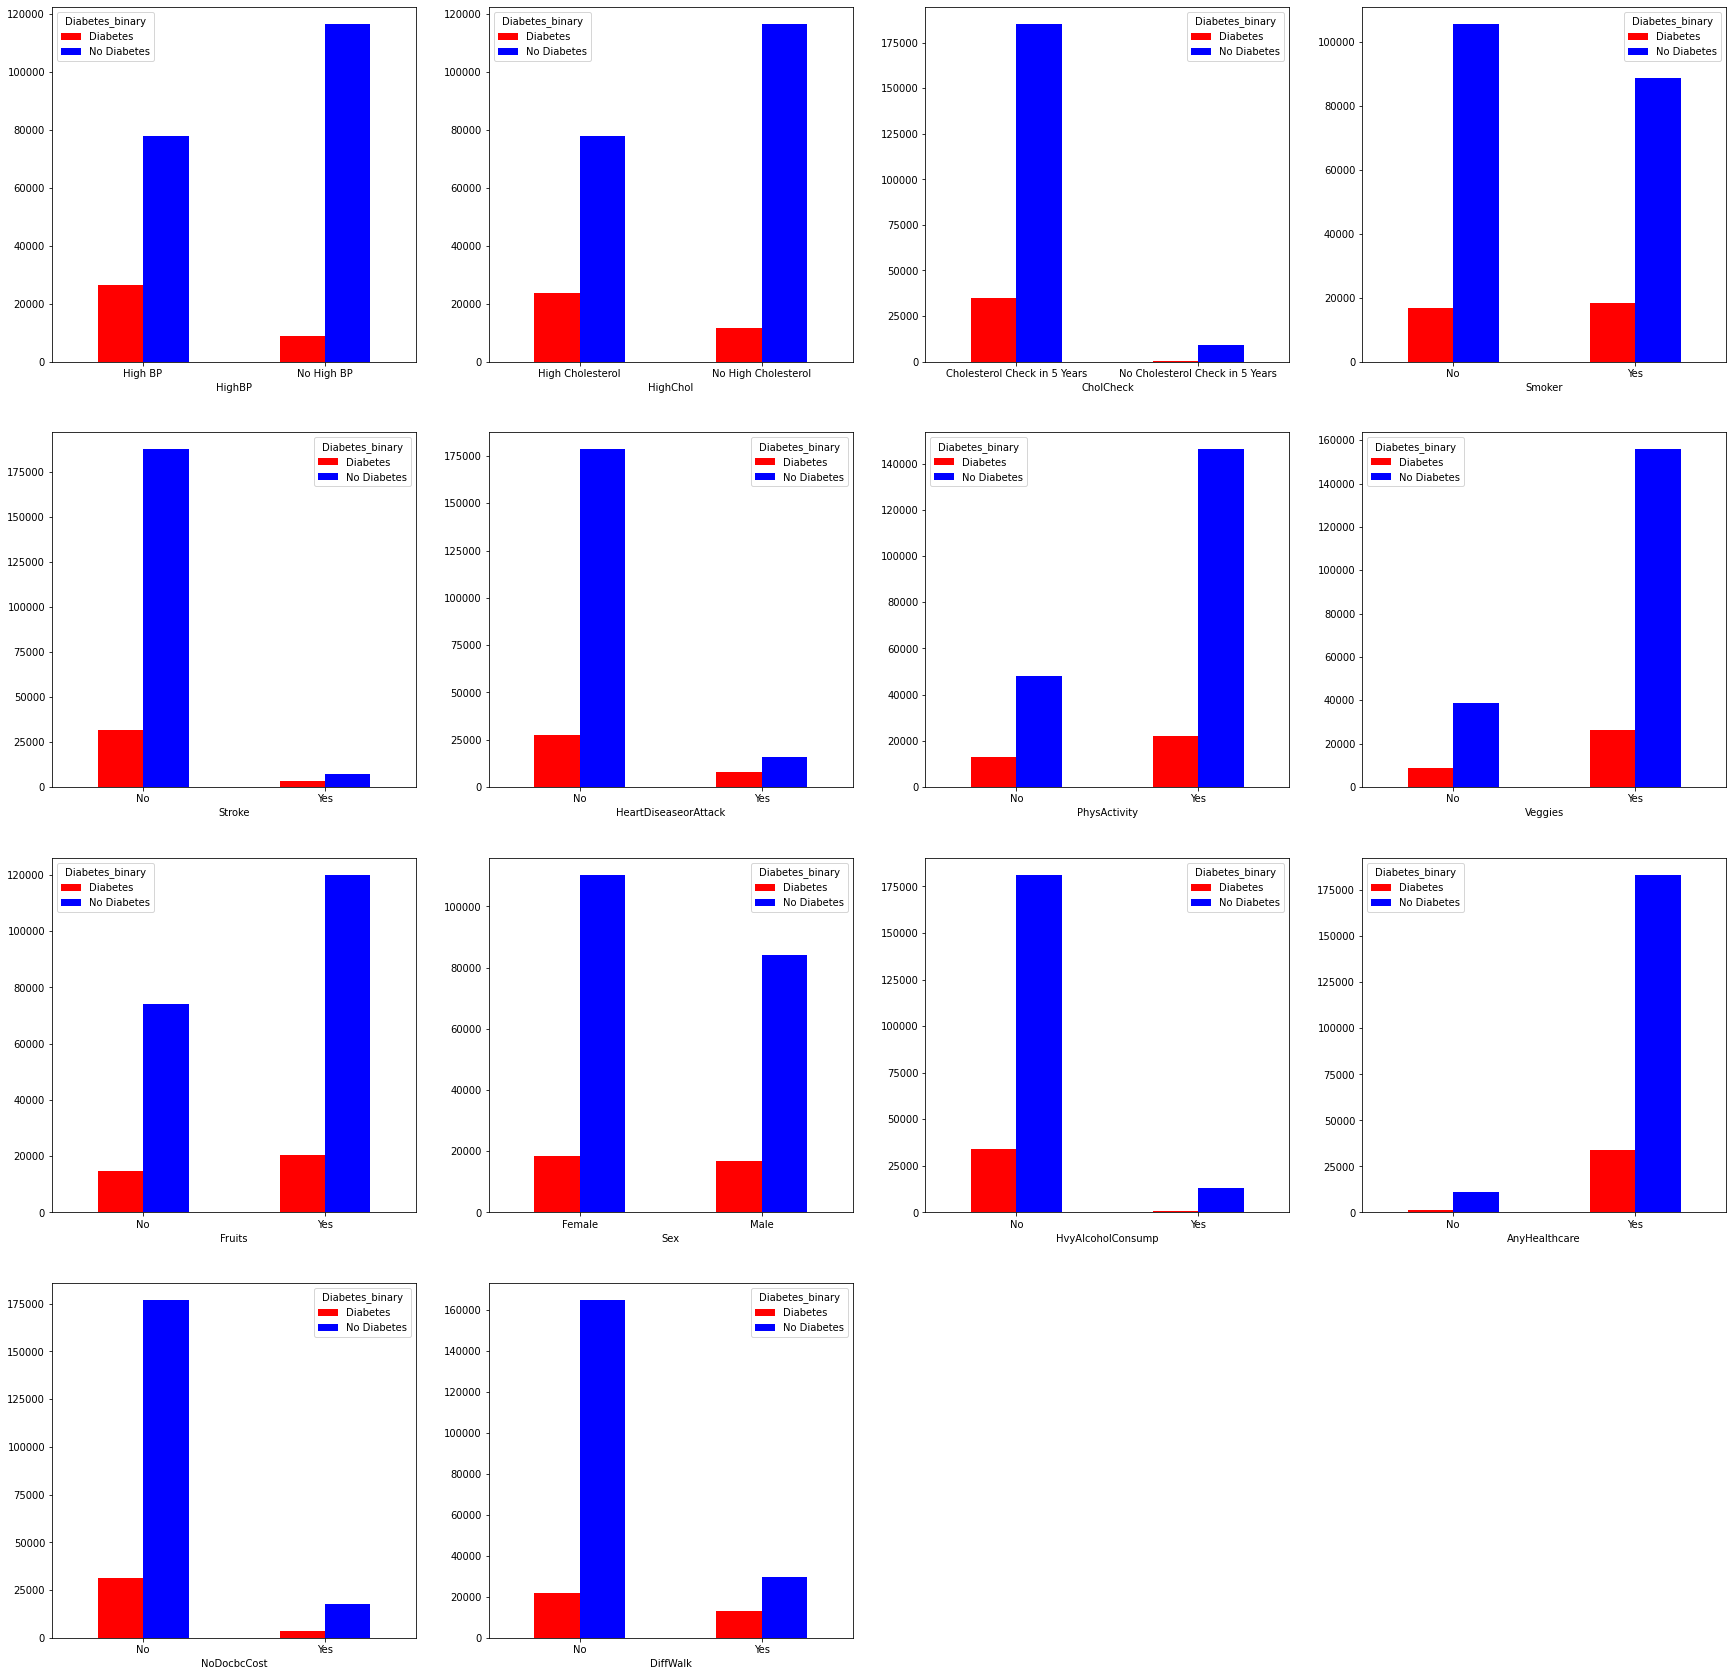

In [ ]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'Fruits', 'Sex',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_plot_pivot(data_str, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data_str.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

fig2, ax2 = plt.subplots(4, 4, figsize=(30,30))
axe = ax2.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data_str, cols[i]).plot(kind='bar',stacked=False, ax=axe[i],  color=['Red','Blue'], rot =0)
    axe[i].set_xlabel(cols[i])

fig2.show()
fig2.delaxes(axe.flatten()[-1])
fig2.delaxes(axe.flatten()[-2])

Based on the analysis of binary variables and target variable, some information is obtained:

1. Most diabetic tend to have high blood pressure.
2. Most diabetic tend to have high cholestrol.
3. Most diabetic having cholestrol check in 5 years.
4. Smoker have minor to almost negligible effect on diabetes.
5. Most diabetic have no stroke. However, in fact, the diabetes increase risk 2 times to develop stroke.
6. Most diabetic have no heart disease or heart attack. However, in fact, diabetes increase risk to develop heart disease and heart attack. Also, heart disease and heart attack increase risk to develop diabetes.
7. Most diabetic having physical activity in the past 30 days.
8. Most diabetic consume veggies 1 or more per day.
9. Consuming fruit have minor to almost negligible effect on diabetes.  
10. Genders have have negligible effect on diabetes.
11. Most diabetic not a heavy alcohol consumption. However, due to the heavy alcohol consumption sample is limited. It is not enough information to support the conclusion.
12. Most diabetic have any kind of health care coverage.
13. Most diabetic have not seeing doctor because of no cost even is needed in the past 12 months.
14. Most diabetic having serious difficulty walking or climbing stairs.


### **Combine effect of smoker and heavy alcohol consumption on diabetes**

In [ ]:
(data_str.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary_str"].value_counts()/data_str.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100

Smoker  HvyAlcoholConsump  Diabetes_binary_str
No      No                 Non-Diabetic           85.851732
                           Diabetic               14.148268
        Yes                Non-Diabetic           95.585492
                           Diabetic                4.414508
Yes     No                 Non-Diabetic           81.993372
                           Diabetic               18.006628
        Yes                Non-Diabetic           93.216438
                           Diabetic                6.783562
dtype: float64

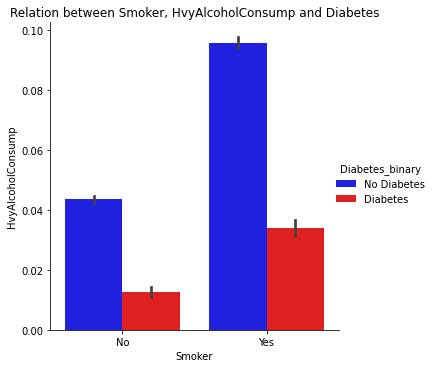

In [ ]:
com1 = sns.catplot(x="Smoker", y="HvyAlcoholConsump", data = data , hue="Diabetes_binary" , kind="bar", palette=['Blue', 'Red'] )
plt.xticks([0,1],['No','Yes'])
plt.title("Relation between Smoker, HvyAlcoholConsump and Diabetes")
legend = com1._legend
legend.set_title("Diabetes_binary")
for t, l in zip(legend.texts,("No Diabetes", "Diabetes")):
    t.set_text(l)

plt.show()

Based on the data, smoking together with heavy alcohol consumption increase risk of developing diabetes.

### **Combine effect of High blood pressure and high cholestrol on diabetes**

In [ ]:
(data_str.groupby(["HighBP" , "HighChol"])["Diabetes_binary_str"].value_counts()/data_str.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].count())*100

HighBP      HighChol             Diabetes_binary_str
High BP     High Cholesterol     Non-Diabetic           69.351803
                                 Diabetic               30.648197
            No High Cholesterol  Non-Diabetic           82.530936
                                 Diabetic               17.469064
No High BP  High Cholesterol     Non-Diabetic           88.654690
                                 Diabetic               11.345310
            No High Cholesterol  Non-Diabetic           95.064283
                                 Diabetic                4.935717
dtype: float64

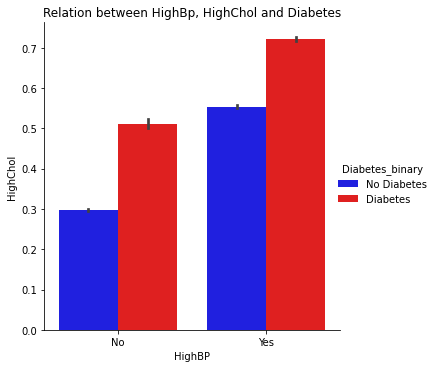

In [ ]:
com2 = sns.catplot(x="HighBP", y="HighChol", data = data , hue="Diabetes_binary" , kind="bar", palette=['Blue', 'Red'] )
plt.xticks([0,1],['No','Yes'])
plt.title("Relation between HighBp, HighChol and Diabetes")
legend = com2._legend
legend.set_title("Diabetes_binary")
for t, l in zip(legend.texts,("No Diabetes", "Diabetes")):
    t.set_text(l)

plt.show()

Based on the data, combine effect of high blood pressure and high cholestrol increase risk of developing diabetes.

### **Combine effect of stroke and heart disease or heart attack**

In [ ]:
(data_str.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary_str"].value_counts()/data_str.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100

Stroke  HeartDiseaseorAttack  Diabetes_binary_str
No      No                    Non-Diabetic           87.157808
                              Diabetic               12.842192
        Yes                   Non-Diabetic           68.549325
                              Diabetic               31.450675
Yes     No                    Non-Diabetic           74.291115
                              Diabetic               25.708885
        Yes                   Non-Diabetic           58.434959
                              Diabetic               41.565041
dtype: float64

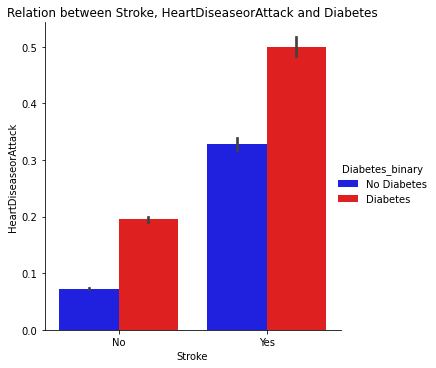

In [ ]:
com3 = sns.catplot(x="Stroke", y="HeartDiseaseorAttack", data = data , hue="Diabetes_binary" , kind="bar", palette=['Blue', 'Red'] )
plt.xticks([0,1],['No','Yes'])
plt.title("Relation between Stroke, HeartDiseaseorAttack and Diabetes")
legend = com3._legend
legend.set_title("Diabetes_binary")
for t, l in zip(legend.texts,("No Diabetes", "Diabetes")):
    t.set_text(l)

plt.show()

Based on the data, combine effect of stroke and heart attack or heart disease increase risk of developing diabetes.

### **Relation between non binary variables and target variable (diabetes binary)**

#### **Relation between BMI and diabetes**

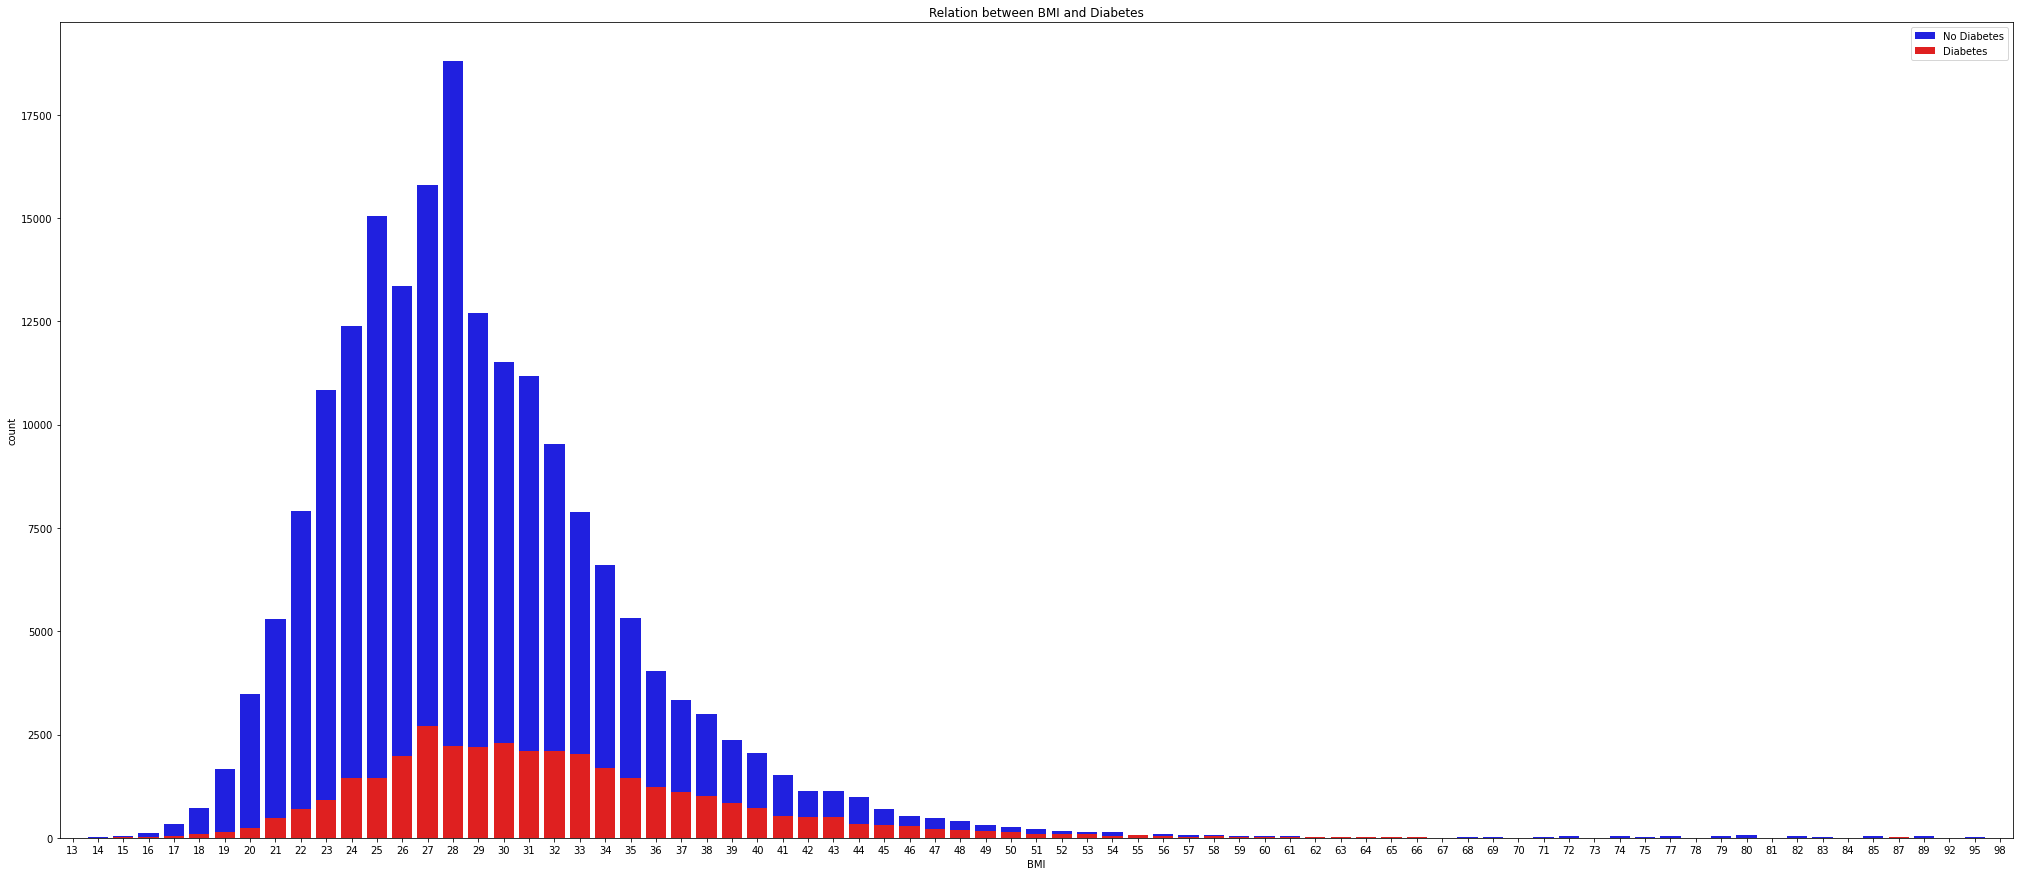

In [ ]:
plt.figure(figsize=(35, 15))
sns.countplot(data_str.BMI[data_str.Diabetes_binary == 'No Diabetes'], color="Blue", label="No Diabetes")
sns.countplot(data_str.BMI[data_str.Diabetes_binary == 'Diabetes'], color="Red", label="Diabetes")
plt.title("Relation between BMI and Diabetes")
plt.legend()
plt.show()


In [ ]:
data[data.Diabetes_binary == 1].BMI.median()

31.0

Based on the distribution, most diabetic have BMI from 20 to 50 with median of 31. However, the visualisation contained to much information.

##### **Classify BMI to different class (underweight, normal weight, overweight and obesity)**

In [ ]:
BMI=pd.cut(data_str['BMI'],bins=[0,18.5,25,30,100],labels=['Underweight, (< 18.5)','Normal weight (18.5 - 24.9)','Overweight (25 - 29.9)','Obesity (>30)'])

pd.crosstab(data_str['Diabetes_binary_str'],BMI, rownames = ["Diabetes_binary"])


BMI,"Underweight, (< 18.5)",Normal weight (18.5 - 24.9),Overweight (25 - 29.9),Obesity (>30)
Diabetes_binary,,,,
Diabetic,169,5350,11419,18159
Non-Diabetic,2883,68285,69995,53214


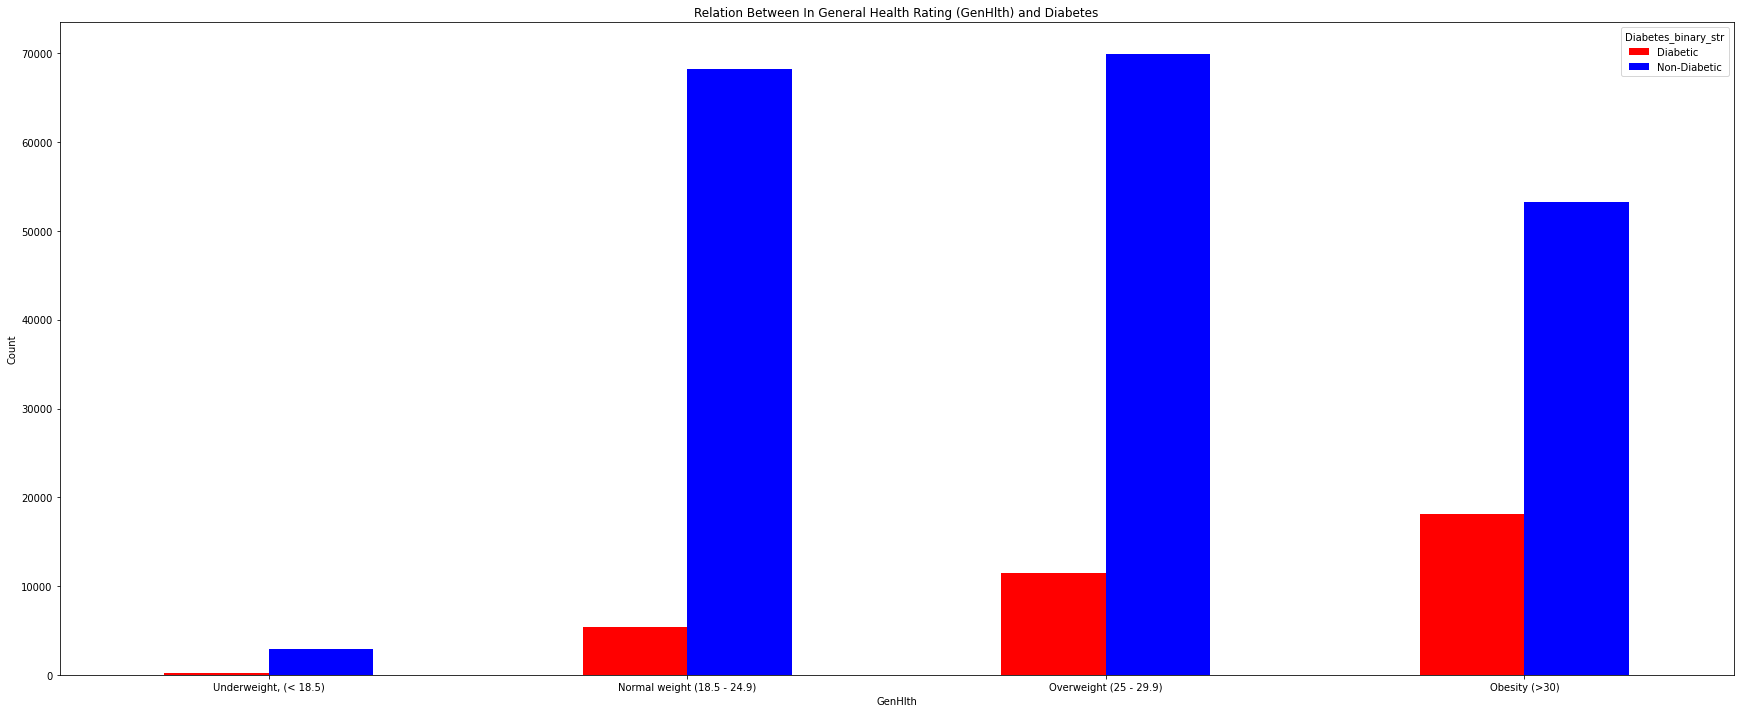

In [ ]:
pd.crosstab(BMI,data_str['Diabetes_binary_str']).plot(kind="bar",figsize=(30,12),color=['Red', 'Blue' ])
plt.title('Relation Between In General Health Rating (GenHlth) and Diabetes')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

Based on the data, most diabetic have BMI of greater than 30 (Obesity). Based on the trend, the risk of developing diabetes is increase with increasing BMI.

#### **Relation between in general health rating and diabetes**

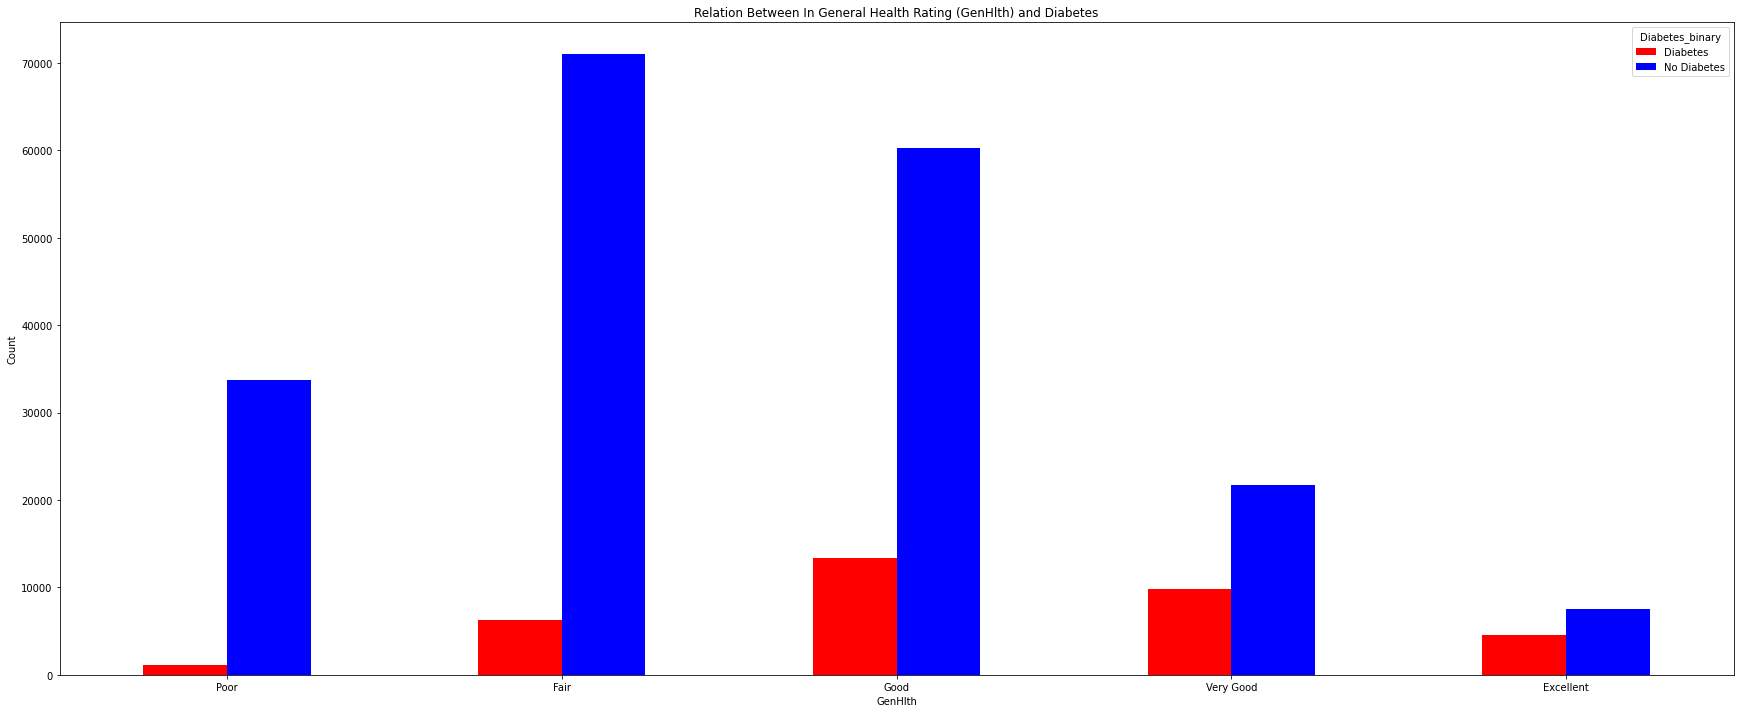

In [ ]:
pd.crosstab(data_str.GenHlth,data_str.Diabetes_binary).sort_index(key=lambda x: x.map({'Poor':0, 'Fair':1, 'Good':2, 'Very Good':3, 'Excellent':4})).plot(kind="bar",figsize=(30,12),color=['Red', 'Blue' ])
plt.title('Relation Between In General Health Rating (GenHlth) and Diabetes')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

From the data, most diabetic have good health rating while least diabetic have poor health rating. Most diabetic feel healthy.

#### **Relation between days of bad mental health and diabetes**  

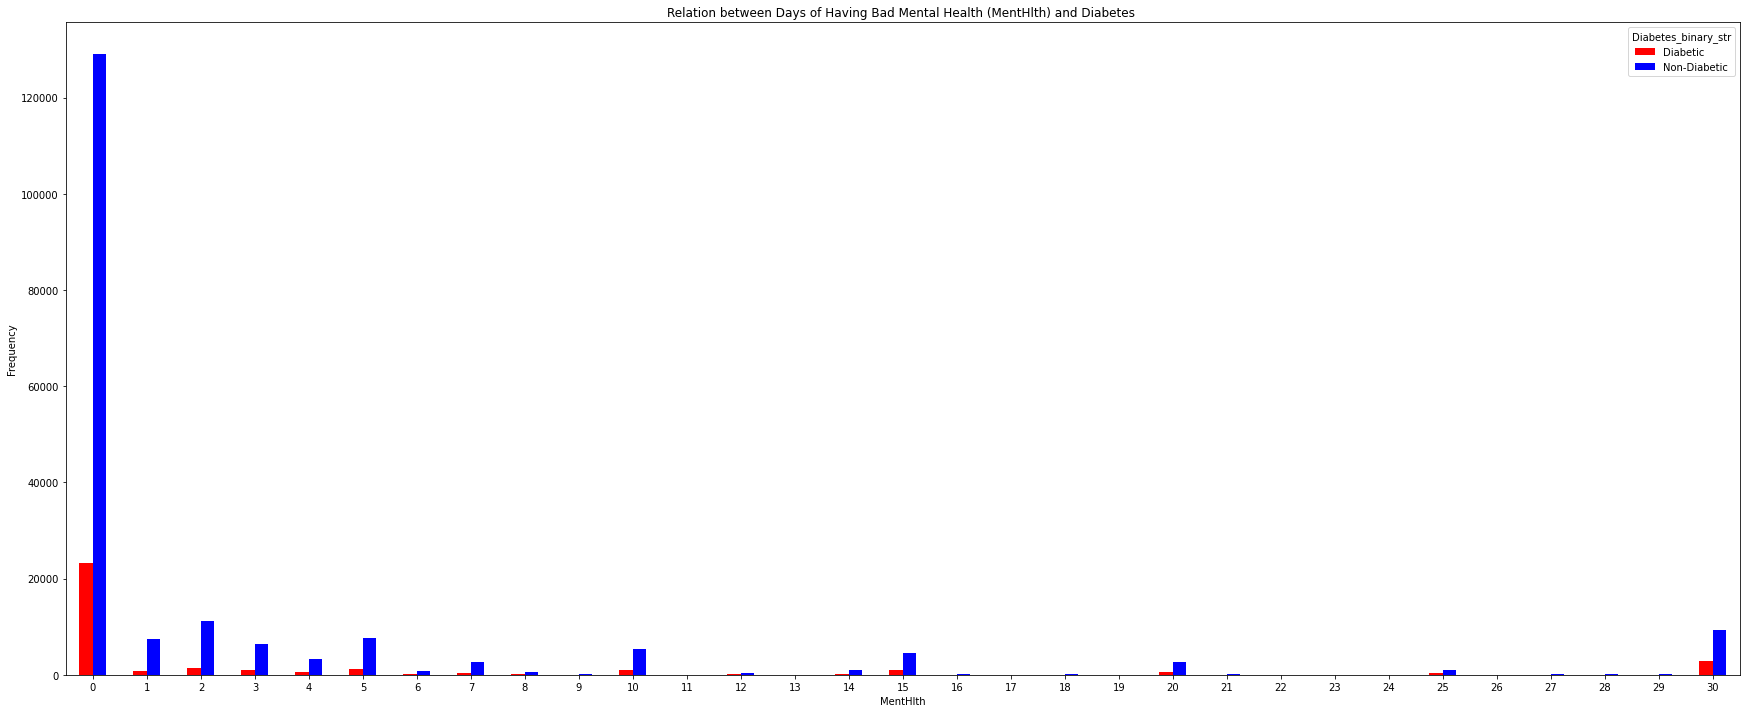

In [ ]:
pd.crosstab(data_str.MentHlth,data_str.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Red', 'Blue' ])
plt.title('Relation between Days of Having Bad Mental Health (MentHlth) and Diabetes ')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Most diabetic have 0 days bad mental health. Based on the data, group 0-5 days of bad mental health have more impact compared to the rest. At 30 days of having bad mental health, there is noticeable high number of diabetic. The days of bad mental health have minor effect on diabetes.

#### **Relation between days of bad physical health and diabetes**

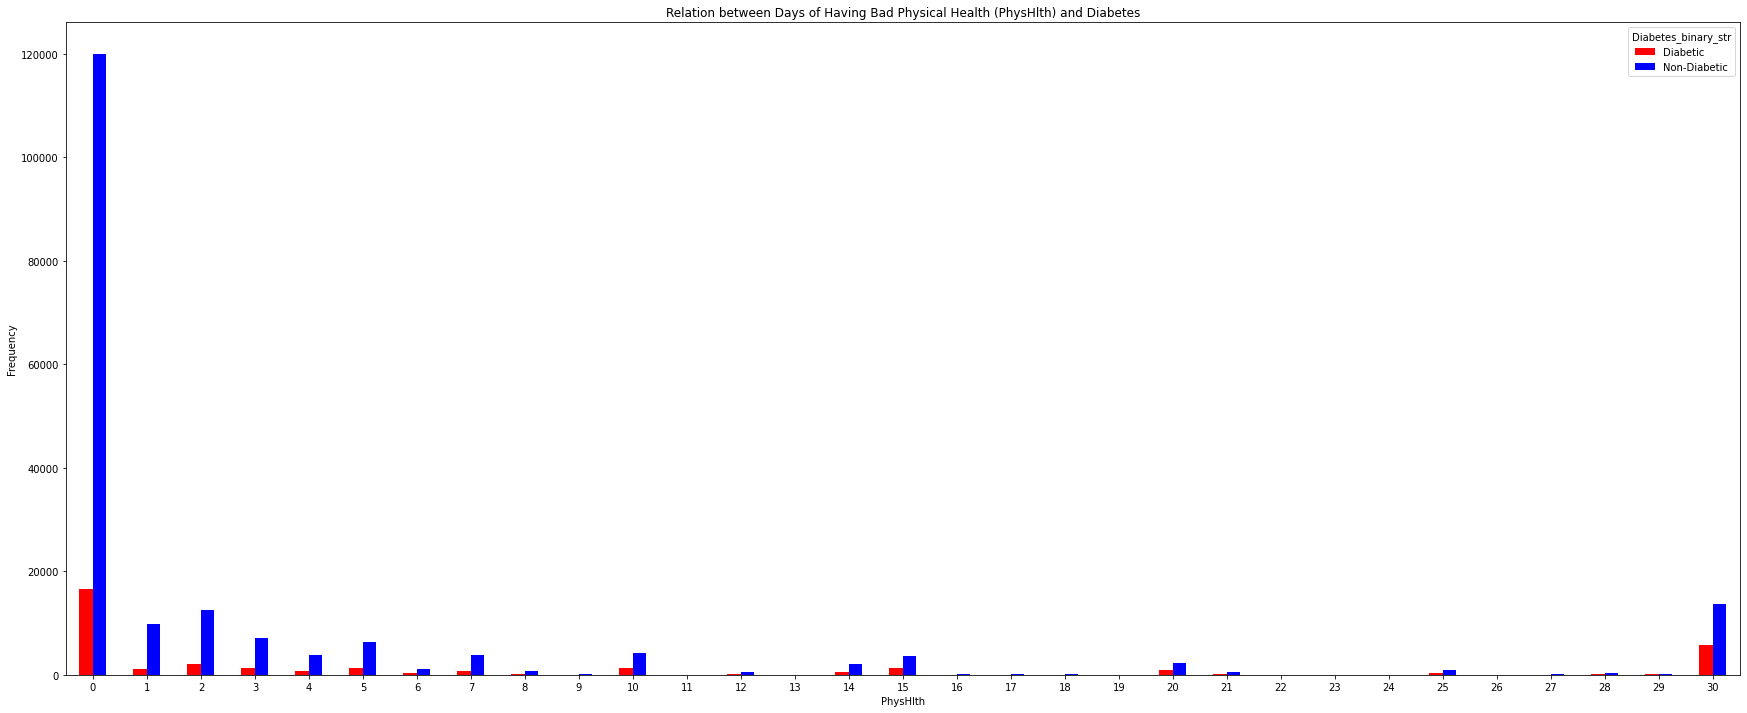

In [ ]:
pd.crosstab(data_str.PhysHlth,data_str.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Red', 'Blue' ])
plt.title('Relation between Days of Having Bad Physical Health (PhysHlth) and Diabetes')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Most diabetic have 0 days bad physical health. Based on the data, group 0-5 days of bad physical health have more impact compared to the rest. At 30 days of having bad physical health, there is noticable high of number of diabetic. The days of bad physical health have minor effect on diabetes.    

#### **Relation between age and diabetes**

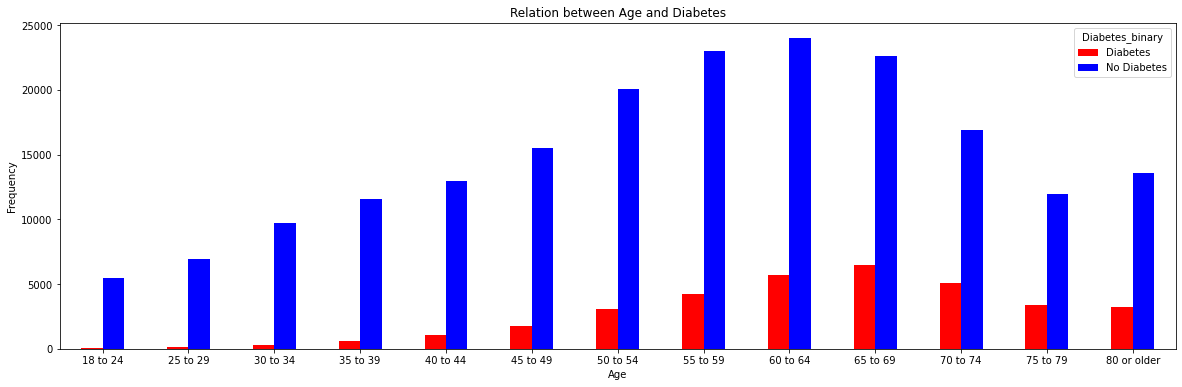

In [ ]:
pd.crosstab(data_str.Age,data_str.Diabetes_binary).plot(kind="bar",figsize=(20,6), color=['Red', 'Blue' ])
plt.title('Relation between Age and Diabetes')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Most diabetic come from age group of 65 to 69. People older than 45 is higher risk to develop diabetes compared to the younger ones. Based on the trend, the risk of diabetes is increase when the age is increase.

#### **Relation between income and diabetes**

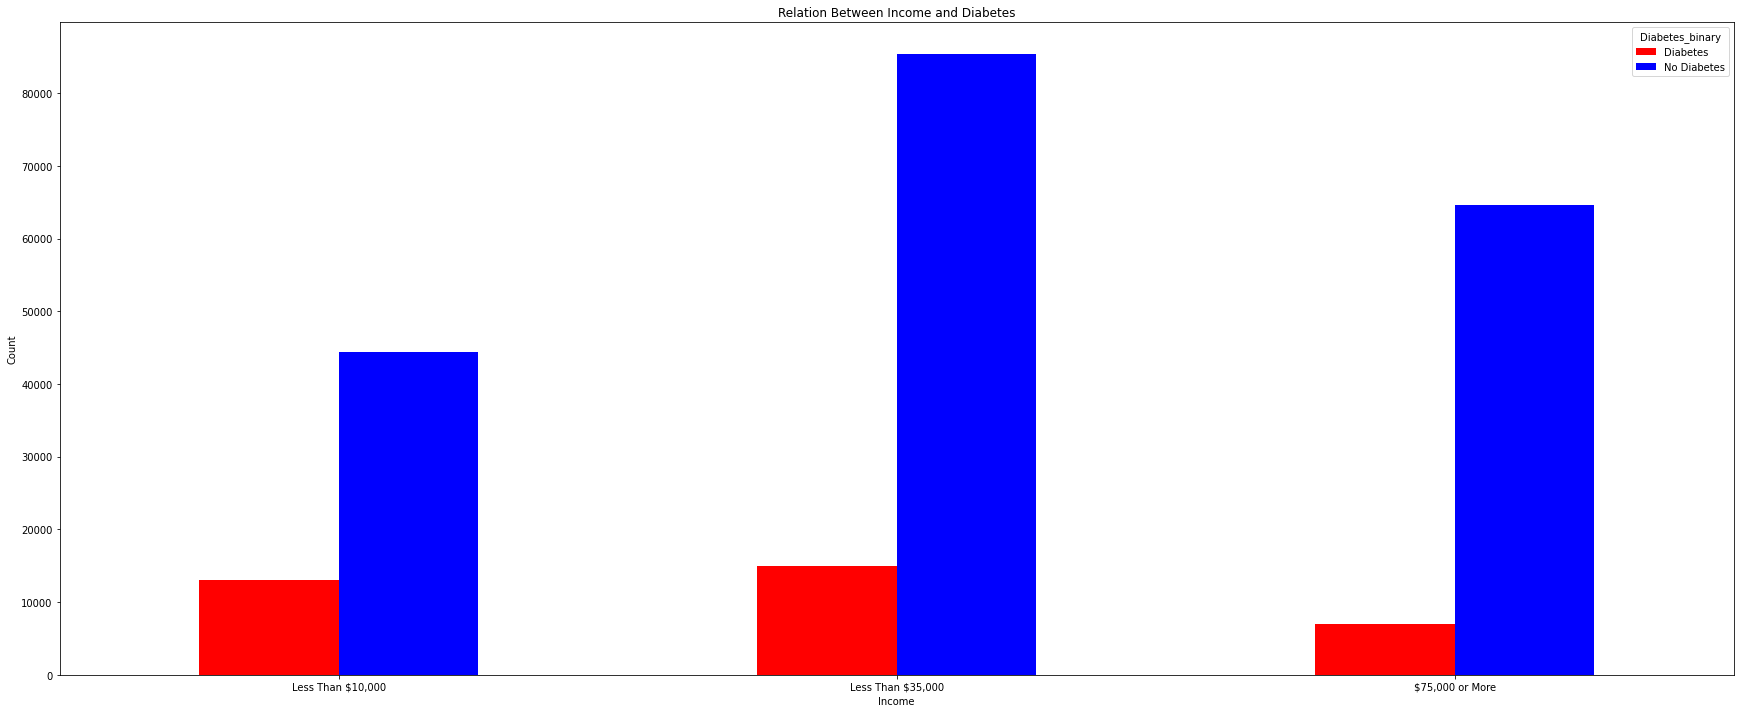

In [ ]:
pd.crosstab(data_str.Income,data_str.Diabetes_binary).sort_index(key=lambda x: x.map({'Less Than $10,000':0, 'Less Than $35,000':1, '$75,000 or More':2})).plot(kind="bar",figsize=(30,12),color=['Red', 'Blue' ])
plt.title('Relation Between Income and Diabetes')
plt.xlabel('Income')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

Most diabetic have income less than 35000 USD while least diabetic have income more than 75000 USD. People that have higher income have lower risk of developing diabetes.

#### **Relation between education and diabetes**

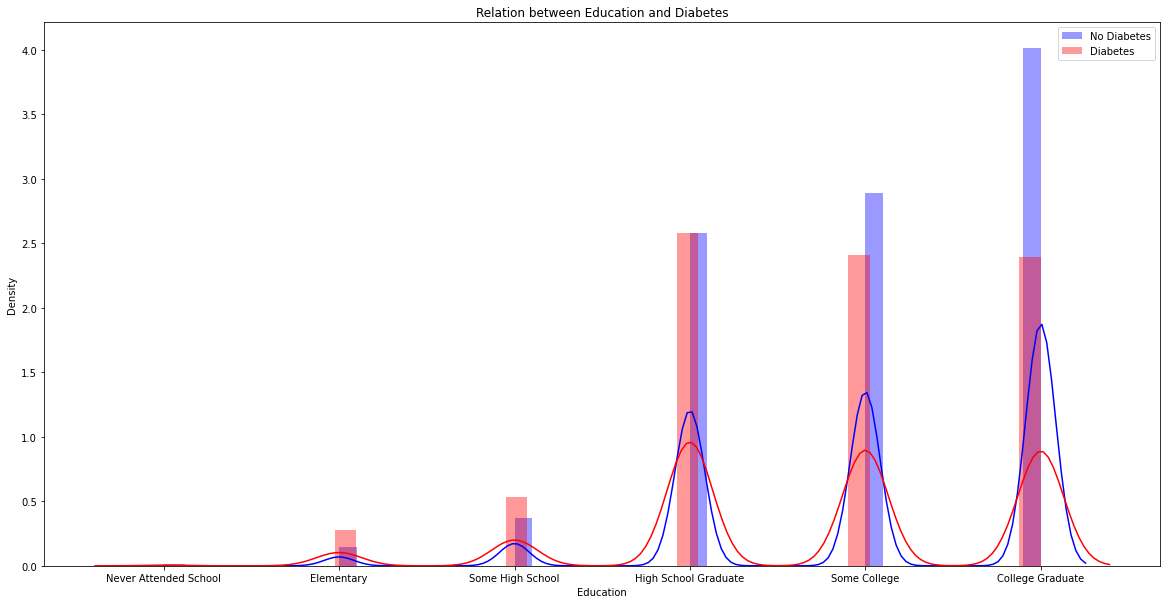

In [ ]:
plt.figure(figsize=(20,10))

sns.distplot(data.Education[data.Diabetes_binary == 0], color="Blue", label="No Diabetes" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="Red", label="Diabetes" )
plt.xticks([1,2,3,4,5,6],['Never Attended School', 'Elementary', 'Some High School', 'High School Graduate', 'Some College', 'College Graduate' ])
plt.title("Relation between Education and Diabetes")

plt.legend()


Most diabetic is high school graduate. Based on the trend, as the education level increase, the number of diabetic is also increase. However, comparing diabetic and non diabetic for each education, people that have only elementary education have higher number of diabetic compared to non-diabetic while people that is college graduate have smaller number of diabetic compared to non-diabeteic. Thus, higher eduction reduce the risk of developing diabetes.

## **Correlation analysis**

In [ ]:
data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


Table above shows the correlation coefficient between variables.

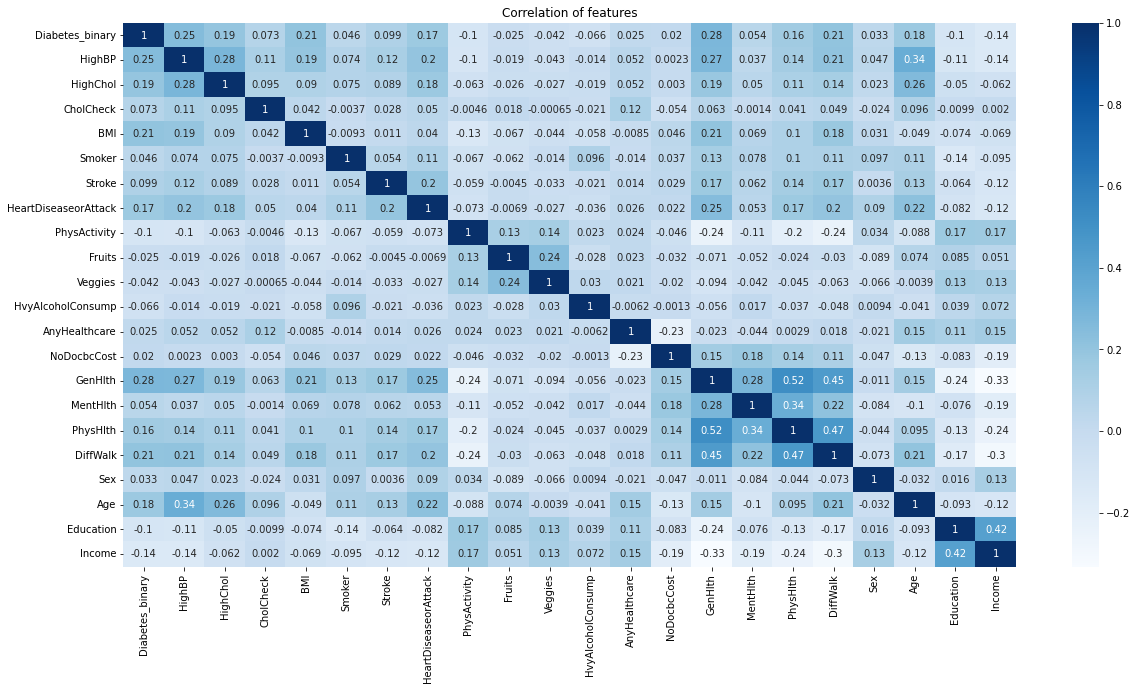

In [ ]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot=True , cmap ='Blues')
plt.title("Correlation of features")
plt.show()

The heatmap shows the correlation between variables.

### **Correlation between variables and the target variable (Diabetes binary)**

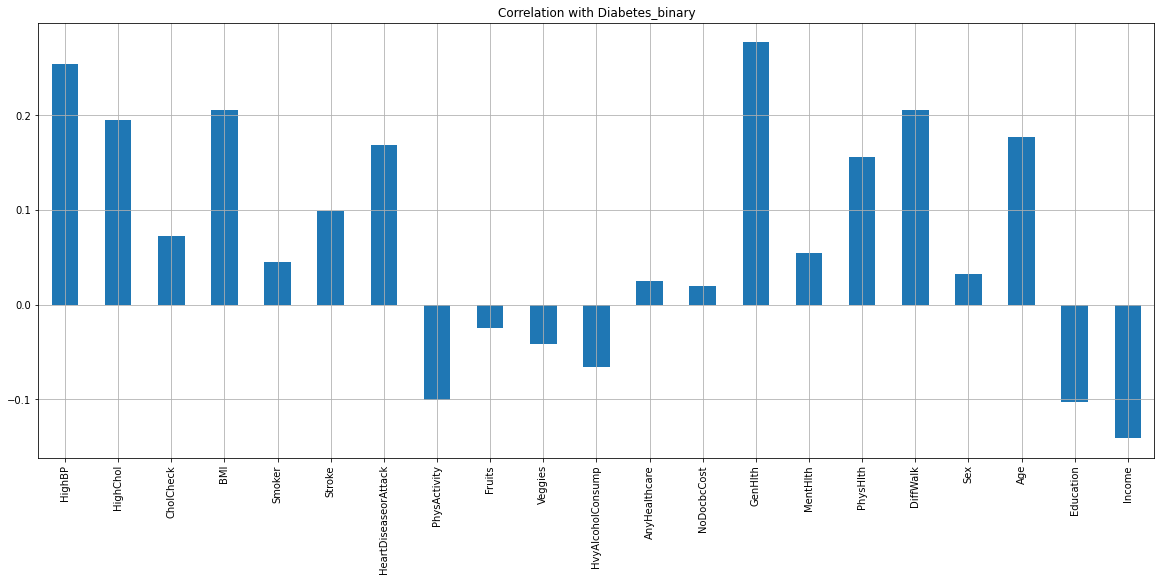

In [ ]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary");

Based on the correlation analysis, AnyHealthCare, NoDocbcCost, Fruits and Sex are the least correlated with the target variable (Diabetes binary). All other variables have a significant correlation with the target variable (Diabetes binary).

# Data Transformation for modelling

In [ ]:
data = data.astype(float)
data_test = data.copy()
#'Underweight, (< 18.5)','Normal weight (18.5 - 24.9)','Overweight (25 - 29.9)','Obesity (>30)'

print(data_test['BMI'].at[0])

40.0


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [ ]:
data_test.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
x = 0
value_catBMI = []
for i in data_test['BMI']:
  if i < 18.5:
    x = 1
  elif (i >= 18.5 and i < 24.9):
    x = 2
  elif (i >= 25 and i < 29.9):
    x = 3
  elif (i >= 30):
    x = 4
  value_catBMI.append(x)


In [ ]:
data_test['BMI_category'] = value_catBMI

In [ ]:
data_test.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_category
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,4
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,3
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,3
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,3
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,2
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,3
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,4
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,3
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,4
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,2


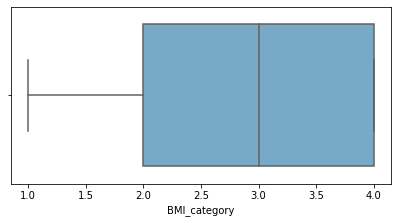

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI_category']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data_test ,palette='Blues')
plt.show()

# Modelling

In [ ]:
X = data.drop('Diabetes_binary', axis=1)
Y = data['Diabetes_binary']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(Y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(Y_test.shape))

Shape of the X_train (183579, 21)
Shape of the y_train (183579,)
Shape of the X_test (45895, 21)
Shape of the y_test (45895,)


## No feature selection, No balancing dataset, No feature scaling

In [ ]:
models = [LogisticRegression(),
         #SVC(kernel='linear', random_state=42, probability=True),
         GaussianNB(),
         KNeighborsClassifier(),
         ExtraTreeClassifier(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         LGBMClassifier(),
         XGBClassifier()
         ]

names = ['Logistic Regression',
         #'SVM',
         'Guassian',
         'K-NN',
         'ExtraTree',
         'RandomForest',
         'Decision Tree',
         'Lightgbm',
         'Xgboost'
         ]

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision_positive = metrics.precision_score(Y_test, Y_pred, pos_label=1)
    precision_negative = metrics.precision_score(Y_test, Y_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(Y_test, Y_pred, pos_label=1)
    recall_specificity = metrics.recall_score(Y_test, Y_pred, pos_label=0)
    f1_positive = metrics.f1_score(Y_test, Y_pred, pos_label=1)
    f1_negative = metrics.f1_score(Y_test, Y_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation11 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

#No feature selection no resampling no scaling.
evaluation11

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.847718,0.525535,0.861029,0.135131,0.977739,0.214984,0.915680
1,Guassian,0.757555,0.332199,0.909048,0.565377,0.792621,0.418500,0.846852
2,K-NN,0.830592,0.396598,0.864775,0.187659,0.947904,0.254769,0.904434
3,ExtraTree,0.780172,0.292191,0.871495,0.298503,0.868060,0.295313,0.869774
4,RandomForest,0.841965,0.466589,0.864131,0.168596,0.964831,0.247692,0.911709
5,Decision Tree,0.773723,0.289698,0.873640,0.321237,0.856285,0.304653,0.864875
6,Lightgbm,0.851683,0.571133,0.864019,0.155888,0.978641,0.244925,0.917765
7,Xgboost,0.851030,0.566252,0.862984,0.147840,0.979337,0.234464,0.917486


Based on the metric it is clearly shows, the dataset is biased toward non diabetes cases. Therefore, the balancing dataset is require to improve the prediction in positive diabetes cases.

## No feature selection, No balancing dataset, Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)
X_test_std = std_sc.fit_transform(X_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(X_train_std,Y_train)
    Y_pred = model.predict(X_test_std)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision_positive = metrics.precision_score(Y_test, Y_pred, pos_label=1)
    precision_negative = metrics.precision_score(Y_test, Y_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(Y_test, Y_pred, pos_label=1)
    recall_specificity = metrics.recall_score(Y_test, Y_pred, pos_label=0)
    f1_positive = metrics.f1_score(Y_test, Y_pred, pos_label=1)
    f1_negative = metrics.f1_score(Y_test, Y_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation12 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

#No feature selection no resampling standard scaler.
evaluation12

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.849156,0.540790,0.862832,0.148828,0.976941,0.233418,0.916347
1,Guassian,0.756814,0.331544,0.909199,0.566789,0.791487,0.418365,0.846269
2,K-NN,0.831398,0.407969,0.867048,0.205309,0.945637,0.273154,0.904639
3,ExtraTree,0.780412,0.290841,0.870937,0.294126,0.869142,0.292474,0.870038
4,RandomForest,0.841856,0.465409,0.863948,0.167184,0.964960,0.246000,0.911664
5,Decision Tree,0.771827,0.286470,0.873330,0.321096,0.854070,0.302796,0.863593
6,Lightgbm,0.851683,0.571133,0.864019,0.155888,0.978641,0.244925,0.917765
7,Xgboost,0.851030,0.566252,0.862984,0.147840,0.979337,0.234464,0.917486


## No feature selection, No balancing dataset, Min max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler()
X_train_mm = mm_sc.fit_transform(X_train)
X_test_mm = mm_sc.fit_transform(X_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(X_train_mm,Y_train)
    Y_pred = model.predict(X_test_mm)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision_positive = metrics.precision_score(Y_test, Y_pred, pos_label=1)
    precision_negative = metrics.precision_score(Y_test, Y_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(Y_test, Y_pred, pos_label=1)
    recall_specificity = metrics.recall_score(Y_test, Y_pred, pos_label=0)
    f1_positive = metrics.f1_score(Y_test, Y_pred, pos_label=1)
    f1_negative = metrics.f1_score(Y_test, Y_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation13 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

#No feature selection no resampling min max scaler.
evaluation13

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.849025,0.539251,0.862763,0.148404,0.976863,0.232754,0.916275
1,Guassian,0.757555,0.332199,0.909048,0.565377,0.792621,0.418500,0.846852
2,K-NN,0.827367,0.380912,0.864578,0.189918,0.943679,0.253463,0.902398
3,ExtraTree,0.781763,0.291560,0.870551,0.289749,0.871538,0.290652,0.871044
4,RandomForest,0.841508,0.462382,0.863830,0.166620,0.964651,0.244966,0.911461
5,Decision Tree,0.772045,0.285913,0.873030,0.318695,0.854765,0.301416,0.863801
6,Lightgbm,0.851683,0.571133,0.864019,0.155888,0.978641,0.244925,0.917765
7,Xgboost,0.851030,0.566252,0.862984,0.147840,0.979337,0.234464,0.917486


## No feature selection, No balancing dataset, Robust scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_sc = RobustScaler()
X_train_rob = rob_sc.fit_transform(X_train)
X_test_rob = rob_sc.fit_transform(X_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(X_train_rob,Y_train)
    Y_pred = model.predict(X_test_rob)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision_positive = metrics.precision_score(Y_test, Y_pred, pos_label=1)
    precision_negative = metrics.precision_score(Y_test, Y_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(Y_test, Y_pred, pos_label=1)
    recall_specificity = metrics.recall_score(Y_test, Y_pred, pos_label=0)
    f1_positive = metrics.f1_score(Y_test, Y_pred, pos_label=1)
    f1_negative = metrics.f1_score(Y_test, Y_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation14 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

#No feature selection no resampling min max scaler.
evaluation14

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.849047,0.539447,0.862800,0.148687,0.976838,0.233119,0.916284
1,Guassian,0.757555,0.332199,0.909048,0.565377,0.792621,0.418500,0.846852
2,K-NN,0.832204,0.413475,0.867598,0.208839,0.945946,0.277512,0.905079
3,ExtraTree,0.779344,0.290203,0.871215,0.297374,0.867287,0.293744,0.869246
4,RandomForest,0.841551,0.462451,0.863669,0.165208,0.964960,0.243446,0.911509
5,Decision Tree,0.772502,0.286350,0.872982,0.317848,0.855461,0.301278,0.864133
6,Lightgbm,0.851683,0.571133,0.864019,0.155888,0.978641,0.244925,0.917765
7,Xgboost,0.851030,0.566252,0.862984,0.147840,0.979337,0.234464,0.917486


## Balancing dataset

#### Under sampling: Near miss method

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)
x_sm,y_sm= nm.fit_resample(X,Y)
XNM_train , XNM_test , YNM_train , YNM_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

### Modelling with Under sampling: Near miss

In [ ]:
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNM_train,YNM_train)
    YNM_pred = model.predict(XNM_test)
    accuracy = metrics.accuracy_score(YNM_test, YNM_pred)
    precision_positive = metrics.precision_score(YNM_test, YNM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNM_test, YNM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNM_test, YNM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNM_test, YNM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNM_test, YNM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNM_test, YNM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation21 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection but using near miss sampling
evaluation21

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.850844,0.915586,0.803430,0.773303,0.928551,0.838451,0.861471
1,Guassian,0.811169,0.926012,0.744917,0.676818,0.945807,0.782044,0.833428
2,K-NN,0.819930,0.909074,0.762529,0.711399,0.928694,0.798180,0.837449
3,ExtraTree,0.783318,0.798681,0.769408,0.758218,0.808471,0.777924,0.788456
4,RandomForest,0.838165,0.883777,0.802142,0.779138,0.897319,0.828165,0.847065
5,Decision Tree,0.786025,0.786906,0.785145,0.785115,0.786937,0.786009,0.786040
6,Lightgbm,0.867512,0.939745,0.815532,0.785684,0.949515,0.855836,0.877438
7,Xgboost,0.861101,0.941401,0.805381,0.770457,0.951940,0.847394,0.872549


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNM_train , XNM_test , YNM_train , YNM_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XNM_train_std = std_sc.fit_transform(XNM_train)
XNM_test_std = std_sc.fit_transform(XNM_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNM_train_std,YNM_train)
    YNM_pred = model.predict(XNM_test_std)
    accuracy = metrics.accuracy_score(YNM_test, YNM_pred)
    precision_positive = metrics.precision_score(YNM_test, YNM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNM_test, YNM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNM_test, YNM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNM_test, YNM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNM_test, YNM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNM_test, YNM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation22 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation22

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.850132,0.921273,0.799414,0.766045,0.934398,0.836519,0.861652
1,Guassian,0.811810,0.928641,0.744845,0.675964,0.947946,0.782408,0.834212
2,K-NN,0.796495,0.889428,0.739206,0.677672,0.915573,0.769243,0.817991
3,ExtraTree,0.776124,0.791767,0.762021,0.749964,0.802339,0.770299,0.781660
4,RandomForest,0.837738,0.881814,0.802685,0.780418,0.895180,0.828024,0.846413
5,Decision Tree,0.786238,0.786916,0.785562,0.785684,0.786794,0.786299,0.786177
6,Lightgbm,0.867512,0.939745,0.815532,0.785684,0.949515,0.855836,0.877438
7,Xgboost,0.861101,0.941401,0.805381,0.770457,0.951940,0.847394,0.872549


### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNM_train , XNM_test , YNM_train , YNM_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XNM_train_mm = mm_sc.fit_transform(XNM_train)
XNM_test_mm = mm_sc.fit_transform(XNM_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNM_train_mm,YNM_train)
    YNM_pred = model.predict(XNM_test_mm)
    accuracy = metrics.accuracy_score(YNM_test, YNM_pred)
    precision_positive = metrics.precision_score(YNM_test, YNM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNM_test, YNM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNM_test, YNM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNM_test, YNM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNM_test, YNM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNM_test, YNM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation23 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation23

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.848066,0.931113,0.791702,0.752099,0.944238,0.832087,0.861268
1,Guassian,0.810029,0.925449,0.743690,0.674826,0.945522,0.780512,0.832549
2,K-NN,0.794928,0.888535,0.737501,0.674968,0.915145,0.767165,0.816776
3,ExtraTree,0.800057,0.828354,0.776172,0.757507,0.842698,0.791348,0.808068
4,RandomForest,0.847995,0.903247,0.805946,0.779849,0.916286,0.837025,0.857581
5,Decision Tree,0.805542,0.812691,0.798689,0.794649,0.816458,0.803569,0.807475
6,Lightgbm,0.860888,0.922974,0.814575,0.787818,0.934113,0.850058,0.870258
7,Xgboost,0.862811,0.949586,0.803968,0.766614,0.959213,0.848346,0.874756


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNM_train , XNM_test , YNM_train , YNM_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XNM_train_rob = rob_sc.fit_transform(XNM_train)
XNM_test_rob = rob_sc.fit_transform(XNM_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNM_train_rob,YNM_train)
    YNM_pred = model.predict(XNM_test_rob)
    accuracy = metrics.accuracy_score(YNM_test, YNM_pred)
    precision_positive = metrics.precision_score(YNM_test, YNM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNM_test, YNM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNM_test, YNM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNM_test, YNM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNM_test, YNM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNM_test, YNM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation24 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation24

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.851058,0.916049,0.803503,0.773303,0.928979,0.838645,0.861697
1,Guassian,0.811169,0.926012,0.744917,0.676818,0.945807,0.782044,0.833428
2,K-NN,0.825700,0.920956,0.765438,0.712964,0.938677,0.803722,0.843252
3,ExtraTree,0.777548,0.794064,0.762735,0.750107,0.805048,0.771460,0.783321
4,RandomForest,0.836741,0.879833,0.802332,0.780418,0.893183,0.827149,0.845323
5,Decision Tree,0.786666,0.788000,0.785339,0.784972,0.788363,0.786483,0.786848
6,Lightgbm,0.867512,0.939745,0.815532,0.785684,0.949515,0.855836,0.877438
7,Xgboost,0.861101,0.941401,0.805381,0.770457,0.951940,0.847394,0.872549


#### Oversampling: SMOTE method

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=10)
XSM, YSM = sm.fit_resample(X, Y)
XSM_train, XSM_test, YSM_train, YSM_test = train_test_split(XSM,YSM,test_size = 0.2, random_state = 42)

#### Modelling with Over sampling: SMOTE

In [ ]:
# Put in Report
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSM_train,YSM_train)
    YSM_pred = model.predict(XSM_test)
    accuracy = metrics.accuracy_score(YSM_test, YSM_pred)
    precision_positive = metrics.precision_score(YSM_test, YSM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSM_test, YSM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSM_test, YSM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSM_test, YSM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSM_test, YSM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSM_test, YSM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation31 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })
#no feature selection + smote
evaluation31

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.734164,0.720859,0.749079,0.763066,0.705343,0.741363,0.726554
1,Guassian,0.721238,0.684531,0.775743,0.819247,0.623504,0.745855,0.691341
2,K-NN,0.815038,0.735716,0.973754,0.982484,0.648061,0.841380,0.778204
3,ExtraTree,0.863603,0.864925,0.862296,0.861338,0.865862,0.863128,0.864075
4,RandomForest,0.907538,0.949523,0.872836,0.860565,0.954380,0.902858,0.911788
5,Decision Tree,0.861802,0.856638,0.867097,0.868576,0.855048,0.862566,0.861030
6,Lightgbm,0.909377,0.967238,0.864405,0.847196,0.971385,0.903246,0.914778
7,Xgboost,0.891744,0.914020,0.871810,0.864506,0.918906,0.888574,0.894739


### Standard Scaler

In [ ]:
std_sc = StandardScaler()
XSM_train_std = std_sc.fit_transform(XSM_train)
XSM_test_std = std_sc.fit_transform(XSM_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSM_train_std,YSM_train)
    YSM_pred = model.predict(XSM_test_std)
    accuracy = metrics.accuracy_score(YSM_test, YSM_pred)
    precision_positive = metrics.precision_score(YSM_test, YSM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSM_test, YSM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSM_test, YSM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSM_test, YSM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSM_test, YSM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSM_test, YSM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation32 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })
#no feature selection + smote + Standard Scaler
evaluation32

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.742293,0.727928,0.758490,0.772649,0.712022,0.749622,0.734521
1,Guassian,0.721444,0.684521,0.776405,0.820046,0.623118,0.746179,0.691367
2,K-NN,0.844722,0.817025,0.877576,0.887844,0.801721,0.850963,0.837935
3,ExtraTree,0.747785,0.688635,0.860045,0.903274,0.592731,0.781485,0.701794
4,RandomForest,0.503479,0.501397,0.868481,0.998506,0.009838,0.667574,0.019456
5,Decision Tree,0.526373,0.513360,0.844969,0.987816,0.066221,0.675611,0.122817
6,Lightgbm,0.499299,0.499299,0.000000,1.000000,0.000000,0.666043,0.000000
7,Xgboost,0.499466,0.499382,0.809524,0.999897,0.000437,0.666095,0.000873


### Min Max Scaler

In [ ]:
mm_sc = MinMaxScaler()
XSM_train_mm = mm_sc.fit_transform(XSM_train)
XSM_test_mm = mm_sc.fit_transform(XSM_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSM_train_mm,YSM_train)
    YSM_pred = model.predict(XSM_test_mm)
    accuracy = metrics.accuracy_score(YSM_test, YSM_pred)
    precision_positive = metrics.precision_score(YSM_test, YSM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSM_test, YSM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSM_test, YSM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSM_test, YSM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSM_test, YSM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSM_test, YSM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation33 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })
#no feature selection + smote + Min max scaler
evaluation33

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.742318,0.727731,0.758800,0.773190,0.711534,0.749772,0.734407
1,Guassian,0.721290,0.684447,0.776089,0.819711,0.623144,0.745997,0.691258
2,K-NN,0.839295,0.835979,0.842662,0.843667,0.834934,0.839806,0.838780
3,ExtraTree,0.859886,0.857095,0.862710,0.863321,0.856460,0.860197,0.859574
4,RandomForest,0.905828,0.939010,0.877400,0.867752,0.943797,0.901976,0.909388
5,Decision Tree,0.835436,0.807942,0.868171,0.879472,0.791523,0.842191,0.828077
6,Lightgbm,0.899641,0.920207,0.881057,0.874862,0.924351,0.896962,0.902185
7,Xgboost,0.886921,0.895316,0.878904,0.875943,0.897868,0.885524,0.888285


Robust Scaler

In [ ]:
rob_sc = RobustScaler()
XSM_train_rob = rob_sc.fit_transform(XSM_train)
XSM_test_rob = rob_sc.fit_transform(XSM_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSM_train_rob,YSM_train)
    YSM_pred = model.predict(XSM_test_rob)
    accuracy = metrics.accuracy_score(YSM_test, YSM_pred)
    precision_positive = metrics.precision_score(YSM_test, YSM_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSM_test, YSM_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSM_test, YSM_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSM_test, YSM_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSM_test, YSM_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSM_test, YSM_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation34 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })
#no feature selection + smote + Robust Scaler
evaluation34

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.741740,0.729270,0.755559,0.767780,0.715772,0.748030,0.735127
1,Guassian,0.721418,0.685208,0.774807,0.817728,0.625379,0.745625,0.692120
2,K-NN,0.844311,0.799614,0.904393,0.918317,0.770511,0.854865,0.832101
3,ExtraTree,0.727476,0.664773,0.865839,0.916205,0.539276,0.770496,0.664609
4,RandomForest,0.705058,0.632867,0.945428,0.974756,0.436116,0.767457,0.596892
5,Decision Tree,0.636493,0.580857,0.927947,0.976868,0.297072,0.728525,0.450061
6,Lightgbm,0.570051,0.537546,0.962658,0.994281,0.147007,0.697822,0.255064
7,Xgboost,0.658332,0.595993,0.944369,0.980062,0.337503,0.741231,0.497284


### Modelling with categorical BMI and Near Miss method to deal with outlier

In [ ]:
Xt = data_test.drop(['Diabetes_binary', 'BMI'], axis=1)
Yt = data_test['Diabetes_binary']
from imblearn.under_sampling import NearMiss
nm_test = NearMiss(version = 1 , n_neighbors = 10)

x_smt,y_smt= nm_test.fit_resample(Xt,Yt)
XNMt_train , XNMt_test , YNMt_train , YNMt_test = train_test_split(x_smt,y_smt, test_size=0.2 , random_state=42)

In [ ]:

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []
for name in models:
    model = name
    model.fit(XNMt_train,YNMt_train)
    YNMt_pred = model.predict(XNMt_test)
    accuracy = metrics.accuracy_score(YNMt_test, YNMt_pred)
    precision_positive = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation41 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

#no feature selection, transformed BMI, near miss sampling
evaluation41

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.831683,0.891933,0.787366,0.755230,0.908300,0.817909,0.843520
1,Guassian,0.795142,0.933570,0.723519,0.635976,0.954649,0.756560,0.823168
2,K-NN,0.806539,0.891553,0.751699,0.698449,0.914860,0.783275,0.825293
3,ExtraTree,0.791296,0.823567,0.764790,0.741995,0.840702,0.780656,0.800951
4,RandomForest,0.820571,0.850981,0.794932,0.777715,0.863520,0.812700,0.827808
5,Decision Tree,0.798632,0.822978,0.777630,0.761491,0.835853,0.791041,0.805691
6,Lightgbm,0.858181,0.927649,0.807999,0.777288,0.939247,0.845838,0.868694
7,Xgboost,0.848493,0.923436,0.795953,0.760353,0.936823,0.833997,0.860662


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNM_train , XNM_test , YNM_train , YNM_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XNMt_train_std = std_sc.fit_transform(XNMt_train)
XNMt_test_std = std_sc.fit_transform(XNMt_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMt_train_std,YNMt_train)
    YNMt_pred = model.predict(XNMt_test_std)
    accuracy = metrics.accuracy_score(YNMt_test, YNMt_pred)
    precision_positive = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation42 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation42

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.830971,0.897099,0.783592,0.748114,0.914005,0.815861,0.843789
1,Guassian,0.793433,0.934513,0.721313,0.631564,0.955647,0.753736,0.822108
2,K-NN,0.779614,0.857091,0.729606,0.671695,0.887764,0.753151,0.800952
3,ExtraTree,0.787592,0.821798,0.759866,0.735022,0.840274,0.775992,0.798050
4,RandomForest,0.820500,0.852605,0.793672,0.775438,0.865659,0.812193,0.828104
5,Decision Tree,0.797920,0.822407,0.776820,0.760495,0.835425,0.790240,0.805057
6,Lightgbm,0.858181,0.927649,0.807999,0.777288,0.939247,0.845838,0.868694
7,Xgboost,0.848493,0.923436,0.795953,0.760353,0.936823,0.833997,0.860662


### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNM_train , XNM_test , YNM_train , YNM_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XNMt_train_mm = mm_sc.fit_transform(XNMt_train)
XNMt_test_mm = mm_sc.fit_transform(XNMt_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMt_train_mm,YNMt_train)
    YNMt_pred = model.predict(XNMt_test_mm)
    accuracy = metrics.accuracy_score(YNMt_test, YNMt_pred)
    precision_positive = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation43 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation43

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.830686,0.893002,0.785301,0.751814,0.909726,0.816349,0.842947
1,Guassian,0.795142,0.933570,0.723519,0.635976,0.954649,0.756560,0.823168
2,K-NN,0.777050,0.852160,0.728192,0.670983,0.883343,0.750796,0.798299
3,ExtraTree,0.794572,0.830330,0.765705,0.740999,0.848260,0.783125,0.804871
4,RandomForest,0.820856,0.852831,0.794114,0.776007,0.865801,0.812607,0.828410
5,Decision Tree,0.797849,0.822877,0.776351,0.759641,0.836138,0.789996,0.805136
6,Lightgbm,0.858181,0.927649,0.807999,0.777288,0.939247,0.845838,0.868694
7,Xgboost,0.848493,0.923436,0.795953,0.760353,0.936823,0.833997,0.860662


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNM_train , XNM_test , YNM_train , YNM_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XNMt_train_rob = rob_sc.fit_transform(XNMt_train)
XNMt_test_rob = rob_sc.fit_transform(XNMt_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMt_train_rob,YNMt_train)
    YNMt_pred = model.predict(XNMt_test_rob)
    accuracy = metrics.accuracy_score(YNMt_test, YNMt_pred)
    precision_positive = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMt_test, YNMt_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMt_test, YNMt_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMt_test, YNMt_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation44 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation44

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.831754,0.893671,0.786542,0.753522,0.910154,0.817634,0.843845
1,Guassian,0.795142,0.933570,0.723519,0.635976,0.954649,0.756560,0.823168
2,K-NN,0.807465,0.892377,0.752609,0.699730,0.915431,0.784398,0.826073
3,ExtraTree,0.795356,0.827603,0.768801,0.746691,0.844124,0.785068,0.804704
4,RandomForest,0.819360,0.849930,0.793624,0.776149,0.862664,0.811366,0.826705
5,Decision Tree,0.799630,0.823160,0.779226,0.763768,0.835568,0.792353,0.806414
6,Lightgbm,0.858181,0.927649,0.807999,0.777288,0.939247,0.845838,0.868694
7,Xgboost,0.848493,0.923436,0.795953,0.760353,0.936823,0.833997,0.860662


Conclusion, Outlier will not be removed since BMI above 30 exist and transforming BMI to categorical will reduce accuracy.

### Feature selection using pearson correlation analysis

In [ ]:
#Pearson Feature Selection
data_feat_corr = data.copy()
cor = data_feat_corr.corr()
cor_target = abs(cor["Diabetes_binary"])
#Selecting highly correlated features
pearson_features = cor_target[cor_target>=0.1]
pearson_features

Xf1 = data_feat_corr[pearson_features.index.drop('Diabetes_binary')]
Yf1 = data_feat_corr['Diabetes_binary']

### Nearmiss

In [ ]:

#NearMiss
from imblearn.under_sampling import NearMiss
nmf1 = NearMiss(version = 1 , n_neighbors = 10)
x_smf1,y_smf1= nmf1.fit_resample(Xf1,Yf1)
XNMf1_train , XNMf1_test , YNMf1_train , YNMf1_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)

#NM
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf1_train,YNMf1_train)
    YNMf1_pred = model.predict(XNMf1_test)
    accuracy = metrics.accuracy_score(YNMf1_test, YNMf1_pred)
    precision_positive = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation51 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })
# correlation analysis feature selection + nearmiss
evaluation51

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.826056,0.877491,0.786844,0.758361,0.893896,0.813588,0.836961
1,Guassian,0.805257,0.896399,0.748029,0.690764,0.919994,0.780260,0.825147
2,K-NN,0.816867,0.889919,0.766727,0.723637,0.910297,0.798211,0.832366
3,ExtraTree,0.823492,0.885052,0.778775,0.743987,0.903166,0.808412,0.836371
4,RandomForest,0.837809,0.876029,0.806552,0.787391,0.888334,0.829349,0.845470
5,Decision Tree,0.827124,0.882823,0.785456,0.754803,0.899601,0.813809,0.838663
6,Lightgbm,0.868509,0.923908,0.825807,0.803472,0.933685,0.859492,0.876439
7,Xgboost,0.862312,0.924500,0.815897,0.789384,0.935396,0.851616,0.871570


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNMf1_train , XNMf1_test , YNMf1_train , YNMf1_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XNMf1_train_std = std_sc.fit_transform(XNMf1_train)
XNMf1_test_std = std_sc.fit_transform(XNMf1_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf1_train_std,YNMf1_train)
    YNMf1_pred = model.predict(XNMf1_test_std)
    accuracy = metrics.accuracy_score(YNMf1_test, YNMf1_pred)
    precision_positive = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation52 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation52

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.827552,0.881544,0.786830,0.757222,0.898032,0.814667,0.838761
1,Guassian,0.804901,0.896596,0.747481,0.689768,0.920280,0.779699,0.824928
2,K-NN,0.819218,0.885322,0.772340,0.733884,0.904735,0.802521,0.833311
3,ExtraTree,0.823420,0.885554,0.778406,0.743276,0.903736,0.808201,0.836402
4,RandomForest,0.837880,0.875573,0.806974,0.788103,0.887764,0.829539,0.845443
5,Decision Tree,0.827694,0.883489,0.785954,0.755372,0.900171,0.814423,0.839194
6,Lightgbm,0.868509,0.923908,0.825807,0.803472,0.933685,0.859492,0.876439
7,Xgboost,0.862312,0.924500,0.815897,0.789384,0.935396,0.851616,0.871570


### Min Max SCaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNMf1_train , XNMf1_test , YNMf1_train , YNMf1_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XNMf1_train_mm = mm_sc.fit_transform(XNMf1_train)
XNMf1_test_mm = mm_sc.fit_transform(XNMf1_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf1_train_mm,YNMf1_train)
    YNMf1_pred = model.predict(XNMf1_test_mm)
    accuracy = metrics.accuracy_score(YNMf1_test, YNMf1_pred)
    precision_positive = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation53 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation53

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.826341,0.898005,0.776408,0.736730,0.916144,0.809412,0.840508
1,Guassian,0.802835,0.898112,0.744189,0.683649,0.922276,0.776341,0.823717
2,K-NN,0.829974,0.906447,0.777578,0.736303,0.923845,0.812564,0.844424
3,ExtraTree,0.813377,0.853862,0.781106,0.756653,0.870222,0.802324,0.823260
4,RandomForest,0.833820,0.857121,0.813312,0.801622,0.866087,0.828443,0.838870
5,Decision Tree,0.810314,0.830506,0.792389,0.780276,0.840416,0.804608,0.815697
6,Lightgbm,0.855973,0.895277,0.823690,0.806603,0.905448,0.848630,0.862636
7,Xgboost,0.857753,0.917913,0.812617,0.786111,0.929549,0.846915,0.867159


## Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNMf1_train , XNMf1_test , YNMf1_train , YNMf1_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XNMf1_train_rob = rob_sc.fit_transform(XNMf1_train)
XNMf1_test_rob = rob_sc.fit_transform(XNMf1_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf1_train_rob,YNMf1_train)
    YNMf1_pred = model.predict(XNMf1_test_rob)
    accuracy = metrics.accuracy_score(YNMf1_test, YNMf1_pred)
    precision_positive = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf1_test, YNMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf1_test, YNMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf1_test, YNMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation54 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation54

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.827196,0.877812,0.788428,0.760638,0.893896,0.815035,0.837856
1,Guassian,0.805257,0.896399,0.748029,0.690764,0.919994,0.780260,0.825147
2,K-NN,0.835601,0.898766,0.789584,0.756795,0.914575,0.821693,0.847496
3,ExtraTree,0.827267,0.886074,0.783884,0.751530,0.903166,0.813275,0.839308
4,RandomForest,0.837951,0.875355,0.807238,0.788530,0.887479,0.829677,0.845459
5,Decision Tree,0.827267,0.882353,0.785937,0.755657,0.899030,0.814105,0.838688
6,Lightgbm,0.868509,0.923908,0.825807,0.803472,0.933685,0.859492,0.876439
7,Xgboost,0.862312,0.924500,0.815897,0.789384,0.935396,0.851616,0.871570


### SMOTE

In [ ]:

#SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=10)
XSMf1, YSMf1 = sm.fit_resample(Xf1, Yf1)
XSMf1_train , XSMf1_test , YSMf1_train , YSMf1_test = train_test_split(XSMf1,YSMf1, test_size=0.2 , random_state=42)

#NM
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf1_train,YSMf1_train)
    YSMf1_pred = model.predict(XSMf1_test)
    accuracy = metrics.accuracy_score(YSMf1_test, YSMf1_pred)
    precision_positive = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation61 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })
# correlation analysis feature selection + nearmiss
evaluation61

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.735515,0.724216,0.747935,0.759512,0.711585,0.741444,0.729307
1,Guassian,0.704505,0.723485,0.688598,0.660699,0.748189,0.690668,0.717158
2,K-NN,0.813340,0.760413,0.892822,0.914196,0.712767,0.830243,0.792698
3,ExtraTree,0.865481,0.880841,0.851364,0.844878,0.886026,0.862485,0.868349
4,RandomForest,0.896451,0.924695,0.871812,0.862883,0.929926,0.892721,0.899932
5,Decision Tree,0.867101,0.875851,0.858781,0.855027,0.879142,0.865314,0.868842
6,Lightgbm,0.899075,0.950256,0.858471,0.841941,0.956049,0.892825,0.904636
7,Xgboost,0.868079,0.878391,0.858350,0.854022,0.882096,0.866035,0.870061


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNMf1_train , XNMf1_test , YNMf1_train , YNMf1_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XSMf1_train_std = std_sc.fit_transform(XSMf1_train)
XSMf1_test_std = std_sc.fit_transform(XSMf1_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf1_train_std,YSMf1_train)
    YSMf1_pred = model.predict(XSMf1_test_std)
    accuracy = metrics.accuracy_score(YSMf1_test, YSMf1_pred)
    precision_positive = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation62 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation62

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.735643,0.722850,0.749905,0.763144,0.708220,0.742450,0.728466
1,Guassian,0.704904,0.723173,0.689497,0.662631,0.747059,0.691580,0.717125
2,K-NN,0.827886,0.822119,0.833839,0.836223,0.819574,0.829111,0.826645
3,ExtraTree,0.690036,0.633543,0.827604,0.899487,0.481171,0.743448,0.608537
4,RandomForest,0.507389,0.503380,0.874851,0.997295,0.018854,0.669057,0.036913
5,Decision Tree,0.521665,0.510856,0.824561,0.987893,0.056743,0.673457,0.106179
6,Lightgbm,0.499299,0.499299,0.000000,1.000000,0.000000,0.666043,0.000000
7,Xgboost,0.499299,0.499299,0.000000,1.000000,0.000000,0.666043,0.000000


### Min Max SCaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNMf1_train , XNMf1_test , YNMf1_train , YNMf1_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XSMf1_train_mm = mm_sc.fit_transform(XSMf1_train)
XSMf1_test_mm = mm_sc.fit_transform(XSMf1_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf1_train_mm,YSMf1_train)
    YSMf1_pred = model.predict(XSMf1_test_mm)
    accuracy = metrics.accuracy_score(YSMf1_test, YSMf1_pred)
    precision_positive = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation63 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation63

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.735862,0.721152,0.752561,0.767909,0.703904,0.743797,0.727420
1,Guassian,0.705534,0.722878,0.690788,0.665284,0.745672,0.692887,0.717182
2,K-NN,0.828169,0.838784,0.818241,0.811906,0.844387,0.825126,0.831108
3,ExtraTree,0.841391,0.835177,0.847814,0.850107,0.832700,0.842576,0.840189
4,RandomForest,0.872117,0.859465,0.885640,0.889287,0.854996,0.874122,0.870048
5,Decision Tree,0.772402,0.720479,0.855750,0.889106,0.656024,0.795960,0.742693
6,Lightgbm,0.843706,0.802007,0.898506,0.912161,0.775443,0.853544,0.832451
7,Xgboost,0.858510,0.846917,0.870854,0.874733,0.842332,0.860600,0.856356


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNMf1_train , XNMf1_test , YNMf1_train , YNMf1_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XSMf1_train_rob = rob_sc.fit_transform(XSMf1_train)
XSMf1_test_rob = rob_sc.fit_transform(XSMf1_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf1_train_rob,YSMf1_train)
    YSMf1_pred = model.predict(XSMf1_test_rob)
    accuracy = metrics.accuracy_score(YSMf1_test, YSMf1_pred)
    precision_positive = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf1_test, YSMf1_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf1_test, YSMf1_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf1_test, YSMf1_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation64 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation64

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.735695,0.724929,0.747469,0.758430,0.713023,0.741301,0.729840
1,Guassian,0.703695,0.722892,0.687645,0.659282,0.747984,0.689624,0.716546
2,K-NN,0.829636,0.808676,0.853540,0.862961,0.796404,0.834937,0.823983
3,ExtraTree,0.759167,0.699873,0.867644,0.906314,0.612433,0.789826,0.718035
4,RandomForest,0.748042,0.675469,0.921314,0.953479,0.543180,0.790750,0.683430
5,Decision Tree,0.667734,0.605344,0.906456,0.961181,0.375109,0.742848,0.530632
6,Lightgbm,0.663426,0.602445,0.898756,0.958270,0.369407,0.739796,0.523602
7,Xgboost,0.740351,0.670112,0.907718,0.945365,0.535911,0.784289,0.673935


### First feature selection chi square


In [ ]:
data_chi = data.copy()

Xchi = data_chi.drop('Diabetes_binary', axis=1)
Ychi = data_chi['Diabetes_binary']

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

FeatureSelection = SelectPercentile(score_func = chi2, percentile=70)
x = FeatureSelection.fit_transform(Xchi, Ychi)

#showing X Dimension
print('X Shape is ' , x.shape)
print('Selected Features are : ' , FeatureSelection.get_support())

X Shape is  (229474, 14)
Selected Features are :  [ True  True False  True False  True  True  True False False  True False
 False  True  True  True  True False  True  True  True]


In [ ]:
fe_chi=FeatureSelection.get_support()
chi_features=[]
for i in range(len(fe_chi)):
    if fe_chi[i]==True:
        chi_features.append(data_chi.columns[i])

chi_features.remove('Diabetes_binary')
chi_features

['HighBP',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'Veggies',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'Age',
 'Education']

In [ ]:
Yf2 = data_chi['Diabetes_binary']
Xf2 = data_chi[chi_features]

In [ ]:

#NearMiss
from imblearn.under_sampling import NearMiss
nmf2 = NearMiss(version = 1 , n_neighbors = 10)
x_smf2,y_smf2= nmf2.fit_resample(Xf2,Yf2)
XNMf2_train , XNMf2_test , YNMf2_train , YNMf2_test = train_test_split(x_smf2,y_smf2, test_size=0.2 , random_state=42)

#NM
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf2_train,YNMf2_train)
    YNMf2_pred = model.predict(XNMf2_test)
    accuracy = metrics.accuracy_score(YNMf2_test, YNMf2_pred)
    precision_positive = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation71 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

#chi square feature selection + near miss
evaluation71

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.804188,0.888203,0.749912,0.696457,0.912151,0.780729,0.823113
1,Guassian,0.731676,0.983106,0.652133,0.472036,0.991871,0.637823,0.786898
2,K-NN,0.835672,0.917995,0.780293,0.737584,0.933970,0.817959,0.850243
3,ExtraTree,0.867298,0.974284,0.799535,0.754803,0.980034,0.850613,0.880630
4,RandomForest,0.869506,0.969456,0.804491,0.763341,0.975898,0.854140,0.881944
5,Decision Tree,0.868082,0.974335,0.800559,0.756368,0.980034,0.851626,0.881252
6,Lightgbm,0.864235,0.946625,0.807368,0.772307,0.956361,0.850627,0.875571
7,Xgboost,0.854121,0.942735,0.794914,0.754376,0.954079,0.838103,0.867254


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNMf2_train , XNMf2_test , YNMf2_train , YNMf2_test = train_test_split(x_smf2,y_smf2, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XNMf2_train_std = std_sc.fit_transform(XNMf2_train)
XNMf2_test_std = std_sc.fit_transform(XNMf2_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf2_train_std,YNMf2_train)
    YNMf2_pred = model.predict(XNMf2_test_std)
    accuracy = metrics.accuracy_score(YNMf2_test, YNMf2_pred)
    precision_positive = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation72 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation72

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.802977,0.893299,0.746231,0.688630,0.917570,0.777724,0.823078
1,Guassian,0.500534,0.500534,0.000000,1.000000,0.000000,0.667141,0.000000
2,K-NN,0.835387,0.906552,0.785289,0.748257,0.922704,0.819833,0.848469
3,ExtraTree,0.866800,0.972512,0.799581,0.755230,0.978608,0.850208,0.880082
4,RandomForest,0.868652,0.970925,0.802718,0.760353,0.977182,0.852833,0.881400
5,Decision Tree,0.868224,0.974345,0.800746,0.756653,0.980034,0.851810,0.881365
6,Lightgbm,0.864235,0.946625,0.807368,0.772307,0.956361,0.850627,0.875571
7,Xgboost,0.854121,0.942735,0.794914,0.754376,0.954079,0.838103,0.867254


### Min Max SCaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNMf2_train , XNMf2_test , YNMf2_train , YNMf2_test = train_test_split(x_smf2,y_smf2, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XNMf2_train_mm = mm_sc.fit_transform(XNMf2_train)
XNMf2_test_mm = mm_sc.fit_transform(XNMf2_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf2_train_mm,YNMf2_train)
    YNMf2_pred = model.predict(XNMf2_test_mm)
    accuracy = metrics.accuracy_score(YNMf2_test, YNMf2_pred)
    precision_positive = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation73 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation73

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.802692,0.887493,0.748186,0.693753,0.911865,0.778754,0.821957
1,Guassian,0.724411,0.982579,0.645955,0.457521,0.991871,0.624332,0.782384
2,K-NN,0.838521,0.906421,0.789930,0.755372,0.921848,0.824032,0.850806
3,ExtraTree,0.866016,0.974198,0.797864,0.752241,0.980034,0.848952,0.879616
4,RandomForest,0.868865,0.969406,0.803641,0.762061,0.975898,0.853318,0.881432
5,Decision Tree,0.868153,0.974340,0.800652,0.756511,0.980034,0.851718,0.881308
6,Lightgbm,0.864235,0.946625,0.807368,0.772307,0.956361,0.850627,0.875571
7,Xgboost,0.854121,0.942735,0.794914,0.754376,0.954079,0.838103,0.867254


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNMf2_train , XNMf2_test , YNMf2_train , YNMf2_test = train_test_split(x_smf2,y_smf2, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XNMf2_train_rob = rob_sc.fit_transform(XNMf2_train)
XNMf2_test_rob = rob_sc.fit_transform(XNMf2_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf2_train_rob,YNMf2_train)
    YNMf2_pred = model.predict(XNMf2_test_rob)
    accuracy = metrics.accuracy_score(YNMf2_test, YNMf2_pred)
    precision_positive = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf2_test, YNMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf2_test, YNMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf2_test, YNMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation74 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation74

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.804260,0.890348,0.749124,0.694464,0.914290,0.780301,0.823507
1,Guassian,0.731106,0.983066,0.651644,0.470898,0.991871,0.636775,0.786542
2,K-NN,0.847567,0.914785,0.798969,0.766899,0.928408,0.834340,0.858839
3,ExtraTree,0.867583,0.974302,0.799907,0.755372,0.980034,0.850982,0.880856
4,RandomForest,0.869578,0.970141,0.804299,0.762914,0.976469,0.854138,0.882061
5,Decision Tree,0.868224,0.974345,0.800746,0.756653,0.980034,0.851810,0.881365
6,Lightgbm,0.864235,0.946625,0.807368,0.772307,0.956361,0.850627,0.875571
7,Xgboost,0.854121,0.942735,0.794914,0.754376,0.954079,0.838103,0.867254


### SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=10)
x_SMf2,y_SMf2= sm.fit_resample(Xf2,Yf2)
XSMf2_train , XSMf2_test , YSMf2_train , YSMf2_test = train_test_split(x_SMf2,y_SMf2, test_size=0.2 , random_state=42)

#NM
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf2_train,YSMf2_train)
    YSMf2_pred = model.predict(XSMf2_test)
    accuracy = metrics.accuracy_score(YSMf2_test, YSMf2_pred)
    precision_positive = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation81 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

#chi square feature selection + near miss
evaluation81

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.718036,0.704874,0.732902,0.748796,0.687362,0.726171,0.709402
1,Guassian,0.707361,0.675071,0.753868,0.797996,0.616979,0.731404,0.678589
2,K-NN,0.764839,0.741754,0.792635,0.811571,0.718238,0.775093,0.753605
3,ExtraTree,0.816054,0.831311,0.802199,0.792380,0.839661,0.811379,0.820503
4,RandomForest,0.839899,0.850044,0.830364,0.824863,0.854893,0.837264,0.842450
5,Decision Tree,0.822292,0.831231,0.813858,0.808171,0.836373,0.819539,0.824962
6,Lightgbm,0.838690,0.860807,0.819205,0.807501,0.869792,0.833302,0.843741
7,Xgboost,0.809250,0.799725,0.819353,0.824425,0.794118,0.811887,0.806538


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNMf2_train , XNMf2_test , YNMf2_train , YNMf2_test = train_test_split(x_smf2,y_smf2, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XSMf2_train_std = std_sc.fit_transform(XSMf2_train)
XSMf2_test_std = std_sc.fit_transform(XSMf2_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf2_train_std,YSMf2_train)
    YSMf2_pred = model.predict(XSMf2_test_std)
    accuracy = metrics.accuracy_score(YSMf2_test, YSMf2_pred)
    precision_positive = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation82 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation82

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.718074,0.703848,0.734323,0.751604,0.684639,0.726942,0.708611
1,Guassian,0.707399,0.675046,0.754035,0.798228,0.616825,0.731487,0.678563
2,K-NN,0.773508,0.781904,0.765637,0.757734,0.789237,0.769629,0.777258
3,ExtraTree,0.752569,0.714825,0.806043,0.839262,0.666119,0.772062,0.729431
4,RandomForest,0.548482,0.525213,0.968627,0.996703,0.101516,0.687924,0.183771
5,Decision Tree,0.520083,0.509946,0.905216,0.995132,0.046365,0.674335,0.088212
6,Lightgbm,0.499338,0.499318,1.000000,1.000000,0.000077,0.666060,0.000154
7,Xgboost,0.499441,0.499370,1.000000,1.000000,0.000283,0.666106,0.000565


### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNMf2_train , XNMf2_test , YNMf2_train , YNMf2_test = train_test_split(x_smf2,y_smf2, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XSMf2_train_mm = mm_sc.fit_transform(XSMf2_train)
XSMf2_test_mm = mm_sc.fit_transform(XSMf2_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf2_train_mm,YSMf2_train)
    YSMf2_pred = model.predict(XSMf2_test_mm)
    accuracy = metrics.accuracy_score(YSMf2_test, YSMf2_pred)
    precision_positive = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation83 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation83

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.717997,0.703844,0.734150,0.751346,0.684742,0.726820,0.708586
1,Guassian,0.707361,0.675071,0.753868,0.797996,0.616979,0.731404,0.678589
2,K-NN,0.779926,0.786533,0.773647,0.767548,0.792268,0.776925,0.782847
3,ExtraTree,0.814395,0.828618,0.801407,0.792097,0.836630,0.809946,0.818640
4,RandomForest,0.840272,0.849918,0.831181,0.825945,0.854559,0.837760,0.842708
5,Decision Tree,0.821211,0.829787,0.813105,0.807578,0.834806,0.818532,0.823813
6,Lightgbm,0.837944,0.857927,0.820145,0.809485,0.866324,0.833002,0.842602
7,Xgboost,0.809250,0.799725,0.819353,0.824425,0.794118,0.811887,0.806538


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNMf2_train , XNMf2_test , YNMf2_train , YNMf2_test = train_test_split(x_smf2,y_smf2, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XSMf2_train_rob = rob_sc.fit_transform(XSMf2_train)
XSMf2_test_rob = rob_sc.fit_transform(XSMf2_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf2_train_rob,YSMf2_train)
    YSMf2_pred = model.predict(XSMf2_test_rob)
    accuracy = metrics.accuracy_score(YSMf2_test, YSMf2_pred)
    precision_positive = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf2_test, YSMf2_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf2_test, YSMf2_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf2_test, YSMf2_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation84 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation84

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.718036,0.703964,0.734082,0.751166,0.684999,0.726799,0.708692
1,Guassian,0.707271,0.674899,0.753958,0.798228,0.616568,0.731401,0.678377
2,K-NN,0.772852,0.763184,0.783202,0.790294,0.755459,0.776502,0.769080
3,ExtraTree,0.796607,0.784888,0.809269,0.816388,0.776882,0.800328,0.792745
4,RandomForest,0.802781,0.757414,0.867196,0.890085,0.715721,0.818408,0.784211
5,Decision Tree,0.766125,0.726328,0.822544,0.852992,0.679502,0.784580,0.744212
6,Lightgbm,0.696917,0.638404,0.839378,0.906339,0.488081,0.749135,0.617246
7,Xgboost,0.761624,0.703869,0.864266,0.902115,0.621526,0.790756,0.723067


### First feature selection random forest

In [ ]:
rf2 = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf2.fit(X_train, Y_train)
rf2.score(X_test, Y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 22.2 s, sys: 34.1 ms, total: 22.2 s
Wall time: 22.1 s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


0.8429022769364855

In [ ]:
print(rf2.score(X_train, Y_train))
print(rf2.score(X_test, Y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9946017790705909
0.8429022769364855


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [ ]:
feature = pd.Series(rf2.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

BMI                     0.183149
Age                     0.123521
Income                  0.102468
PhysHlth                0.084884
Education               0.071808
GenHlth                 0.067952
MentHlth                0.063334
HighBP                  0.039464
Fruits                  0.033794
Smoker                  0.033760
PhysActivity            0.027409
Sex                     0.027135
Veggies                 0.026957
HighChol                0.025460
DiffWalk                0.022824
HeartDiseaseorAttack    0.018194
NoDocbcCost             0.015308
Stroke                  0.012391
AnyHealthcare           0.008850
HvyAlcoholConsump       0.007679
CholCheck               0.003659
dtype: float64


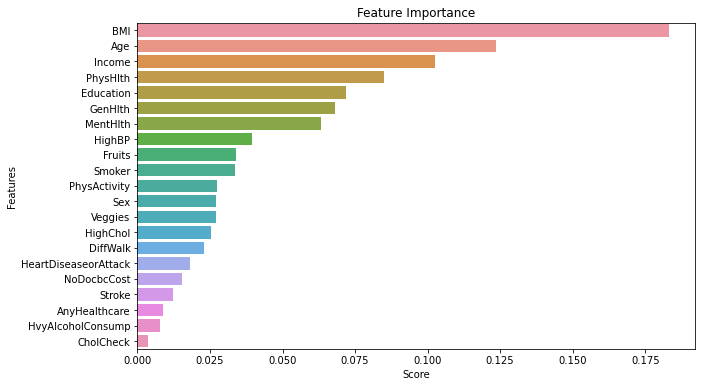

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [ ]:
rf_features=list(feature[feature>0.025].index)
rf_features

['BMI',
 'Age',
 'Income',
 'PhysHlth',
 'Education',
 'GenHlth',
 'MentHlth',
 'HighBP',
 'Fruits',
 'Smoker',
 'PhysActivity',
 'Sex',
 'Veggies',
 'HighChol']

In [ ]:
data_rf = data.copy()

Yf3 = data_rf['Diabetes_binary']
Xf3 = data_rf[rf_features]

In [ ]:

#NearMiss
from imblearn.under_sampling import NearMiss
nmf3 = NearMiss(version = 1 , n_neighbors = 10)
x_smf3,y_smf3= nmf3.fit_resample(Xf3,Yf3)
XNMf3_train , XNMf3_test , YNMf3_train , YNMf3_test = train_test_split(x_smf3,y_smf3, test_size=0.2 , random_state=42)

#NM
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf3_train,YNMf3_train)
    YNMf3_pred = model.predict(XNMf3_test)
    accuracy = metrics.accuracy_score(YNMf3_test, YNMf3_pred)
    precision_positive = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation91 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# random forest feature selection + near miss
evaluation91

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.825415,0.890710,0.778688,0.742280,0.908728,0.809749,0.838697
1,Guassian,0.798775,0.967512,0.719329,0.618756,0.979179,0.754796,0.829377
2,K-NN,0.810385,0.887449,0.758744,0.711399,0.909584,0.789731,0.827345
3,ExtraTree,0.769927,0.788132,0.753826,0.739007,0.800913,0.762779,0.776656
4,RandomForest,0.820500,0.858780,0.789508,0.767611,0.873503,0.810640,0.829384
5,Decision Tree,0.775625,0.781800,0.769693,0.765334,0.785938,0.773479,0.777731
6,Lightgbm,0.856685,0.931212,0.803988,0.770599,0.942955,0.843327,0.867944
7,Xgboost,0.849918,0.929920,0.794878,0.757222,0.942812,0.834732,0.862548


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNMf3_train , XNMf3_test , YNMf3_train , YNMf3_test = train_test_split(x_smf3,y_smf3, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XNMf3_train_std = std_sc.fit_transform(XNMf3_train)
XNMf3_test_std = std_sc.fit_transform(XNMf3_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf3_train_std,YNMf3_train)
    YNMf3_pred = model.predict(XNMf3_test_std)
    accuracy = metrics.accuracy_score(YNMf3_test, YNMf3_pred)
    precision_positive = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation92 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation92

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.825557,0.894112,0.777184,0.739007,0.912293,0.809194,0.839336
1,Guassian,0.798276,0.968087,0.718665,0.617333,0.979606,0.753910,0.829089
2,K-NN,0.770283,0.851256,0.719485,0.655614,0.885197,0.740735,0.793785
3,ExtraTree,0.775126,0.795510,0.757309,0.741284,0.809042,0.767440,0.782321
4,RandomForest,0.818719,0.857416,0.787489,0.765049,0.872504,0.808603,0.827819
5,Decision Tree,0.777477,0.784020,0.771205,0.766614,0.788363,0.775219,0.779690
6,Lightgbm,0.856899,0.930508,0.804652,0.771738,0.942242,0.843718,0.868029
7,Xgboost,0.849918,0.929920,0.794878,0.757222,0.942812,0.834732,0.862548


### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNMf3_train , XNMf3_test , YNMf3_train , YNMf3_test = train_test_split(x_smf3,y_smf3, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XNMf3_train_mm = mm_sc.fit_transform(XNMf3_train)
XNMf3_test_mm = mm_sc.fit_transform(XNMf3_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf3_train_mm,YNMf3_train)
    YNMf3_pred = model.predict(XNMf3_test_mm)
    accuracy = metrics.accuracy_score(YNMf3_test, YNMf3_pred)
    precision_positive = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation93 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation93

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.823136,0.906731,0.767893,0.720791,0.925699,0.803140,0.839444
1,Guassian,0.795783,0.969102,0.715773,0.611499,0.980462,0.749847,0.827466
2,K-NN,0.771422,0.858161,0.718337,0.650918,0.892185,0.740309,0.795878
3,ExtraTree,0.784101,0.812676,0.760230,0.739007,0.829293,0.774093,0.793261
4,RandomForest,0.824703,0.868107,0.790353,0.766188,0.883343,0.813969,0.834265
5,Decision Tree,0.785740,0.792802,0.778986,0.774299,0.797205,0.783441,0.787990
6,Lightgbm,0.842154,0.895057,0.801635,0.775580,0.908871,0.831046,0.851891
7,Xgboost,0.845929,0.923546,0.792214,0.754661,0.937393,0.830605,0.858711


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNMf3_train , XNMf3_test , YNMf3_train , YNMf3_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XNMf3_train_rob = rob_sc.fit_transform(XNMf3_train)
XNMf3_test_rob = rob_sc.fit_transform(XNMf3_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XNMf3_train_rob,YNMf3_train)
    YNMf3_pred = model.predict(XNMf3_test_rob)
    accuracy = metrics.accuracy_score(YNMf3_test, YNMf3_pred)
    precision_positive = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YNMf3_test, YNMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YNMf3_test, YNMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YNMf3_test, YNMf3_pred, pos_label=0)



    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation94 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation94

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.825486,0.890196,0.779056,0.742991,0.908157,0.809960,0.838667
1,Guassian,0.798775,0.967512,0.719329,0.618756,0.979179,0.754796,0.829377
2,K-NN,0.813733,0.894633,0.760208,0.711684,0.916001,0.792740,0.830865
3,ExtraTree,0.774557,0.791956,0.759057,0.745411,0.803765,0.767979,0.780772
4,RandomForest,0.820358,0.862313,0.787011,0.762914,0.877924,0.809574,0.829985
5,Decision Tree,0.778189,0.784582,0.772055,0.767611,0.788791,0.776003,0.780333
6,Lightgbm,0.856685,0.931212,0.803988,0.770599,0.942955,0.843327,0.867944
7,Xgboost,0.849918,0.929920,0.794878,0.757222,0.942812,0.834732,0.862548


### SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=10)
x_SMf3,y_SMf3= sm.fit_resample(Xf3,Yf3)
XSMf3_train , XSMf3_test , YSMf3_train , YSMf3_test = train_test_split(x_SMf3,y_SMf3, test_size=0.2 , random_state=42)

#NM
accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf3_train,YSMf3_train)
    YSMf3_pred = model.predict(XSMf3_test)
    accuracy = metrics.accuracy_score(YSMf3_test, YSMf3_pred)
    precision_positive = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation101 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# random forest feature selection + near miss
evaluation101

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.738653,0.725804,0.752963,0.765926,0.711456,0.745325,0.731622
1,Guassian,0.723708,0.729249,0.718460,0.710389,0.736989,0.719695,0.727607
2,K-NN,0.819411,0.742532,0.966698,0.977126,0.662137,0.843828,0.785944
3,ExtraTree,0.863552,0.865421,0.861708,0.860539,0.866555,0.862974,0.864125
4,RandomForest,0.904348,0.941978,0.872725,0.861492,0.947085,0.899939,0.908385
5,Decision Tree,0.863101,0.858295,0.868020,0.869349,0.856871,0.863786,0.862410
6,Lightgbm,0.908554,0.964249,0.864925,0.848304,0.968636,0.902568,0.913847
7,Xgboost,0.890702,0.911651,0.871848,0.864918,0.916414,0.887670,0.893575


### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#XNMf3_train , XNMf3_test , YNMf3_train , YNMf3_test = train_test_split(x_smf3,y_smf3, test_size=0.2 , random_state=42)
std_sc = StandardScaler()
XSMf3_train_std = std_sc.fit_transform(XSMf3_train)
XSMf3_test_std = std_sc.fit_transform(XSMf3_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf3_train_std,YSMf3_train)
    YSMf3_pred = model.predict(XSMf3_test_std)
    accuracy = metrics.accuracy_score(YSMf3_test, YSMf3_pred)
    precision_positive = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation102 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Standard Scaler
evaluation102

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.739154,0.725044,0.755053,0.769326,0.709068,0.746529,0.731338
1,Guassian,0.723811,0.729245,0.718659,0.710724,0.736861,0.719865,0.727646
2,K-NN,0.840349,0.818491,0.865318,0.874089,0.806704,0.845377,0.834984
3,ExtraTree,0.784787,0.734899,0.861103,0.890034,0.679836,0.805061,0.759808
4,RandomForest,0.517974,0.508819,0.952055,0.998017,0.039276,0.674008,0.075439
5,Decision Tree,0.523273,0.511649,0.885124,0.992839,0.055022,0.675293,0.103603
6,Lightgbm,0.499338,0.499318,1.000000,1.000000,0.000077,0.666060,0.000154
7,Xgboost,0.499762,0.499530,0.928571,0.999923,0.001002,0.666232,0.002001


### Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#XNMf3_train , XNMf3_test , YNMf3_train , YNMf3_test = train_test_split(x_smf3,y_smf3, test_size=0.2 , random_state=42)
mm_sc = MinMaxScaler()
XSMf3_train_mm = mm_sc.fit_transform(XSMf3_train)
XSMf3_test_mm = mm_sc.fit_transform(XSMf3_test)


accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf3_train_mm,YSMf3_train)
    YSMf3_pred = model.predict(XSMf3_test_mm)
    accuracy = metrics.accuracy_score(YSMf3_test, YSMf3_pred)
    precision_positive = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=0)


    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation103 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Min Max Scaler
evaluation103

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.740132,0.723235,0.759673,0.776796,0.703571,0.749059,0.730546
1,Guassian,0.724081,0.727699,0.720597,0.714897,0.733239,0.721241,0.726863
2,K-NN,0.839616,0.846023,0.833468,0.829809,0.849396,0.837837,0.841357
3,ExtraTree,0.856452,0.854979,0.857931,0.858041,0.854868,0.856507,0.856397
4,RandomForest,0.899024,0.919807,0.880264,0.873960,0.924017,0.896298,0.901610
5,Decision Tree,0.817919,0.779156,0.868920,0.886634,0.749396,0.829428,0.804745
6,Lightgbm,0.897030,0.913524,0.881853,0.876768,0.917236,0.894769,0.899197
7,Xgboost,0.884670,0.889332,0.880135,0.878313,0.891010,0.883788,0.885539


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

#XNMf3_train , XNMf3_test , YNMf3_train , YNMf3_test = train_test_split(x_smf1,y_smf1, test_size=0.2 , random_state=42)
rob_sc = RobustScaler()
XSMf3_train_rob = rob_sc.fit_transform(XSMf3_train)
XSMf3_test_rob = rob_sc.fit_transform(XSMf3_test)

accuracy_list = []
precision_p_list = []
precision_n_list = []
recall_sensitivity_list = []
recall_specitivity_list = []
f1_p_list = []
f1_n_list = []

for name in models:
    model = name
    model.fit(XSMf3_train_rob,YSMf3_train)
    YSMf3_pred = model.predict(XSMf3_test_rob)
    accuracy = metrics.accuracy_score(YSMf3_test, YSMf3_pred)
    precision_positive = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=1)
    precision_negative = metrics.precision_score(YSMf3_test, YSMf3_pred, pos_label=0)
    recall_sensitivity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=1)
    recall_specificity = metrics.recall_score(YSMf3_test, YSMf3_pred, pos_label=0)
    f1_positive = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=1)
    f1_negative = metrics.f1_score(YSMf3_test, YSMf3_pred, pos_label=0)



    accuracy_list.append(accuracy)
    precision_p_list.append(precision_positive)
    precision_n_list.append(precision_negative)
    recall_sensitivity_list.append(recall_sensitivity)
    recall_specitivity_list.append(recall_specificity)
    f1_p_list.append(f1_positive)
    f1_n_list.append(f1_negative)

evaluation104 = pd.DataFrame({'Model': names,
                           'Accuracy': accuracy_list,
                           'Precision Positive': precision_p_list,
                           'Precision Negative': precision_n_list,
                           'Recall Sensitivity': recall_sensitivity_list,
                           'Recall Specitivity': recall_specitivity_list,
                           'F1 Positive': f1_p_list,
                           'F1 Negative': f1_n_list
                           })

# no feature selection + NM + Robust Scaler
evaluation104

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative
0,Logistic Regression,0.739489,0.724357,0.756701,0.772031,0.707038,0.747434,0.731027
1,Guassian,0.723811,0.728798,0.719065,0.711677,0.735911,0.720136,0.727390
2,K-NN,0.842510,0.804897,0.890486,0.903609,0.781582,0.851401,0.832487
3,ExtraTree,0.636313,0.585170,0.836036,0.933052,0.340406,0.719254,0.483817
4,RandomForest,0.521254,0.510611,0.847658,0.990366,0.053455,0.673817,0.100568
5,Decision Tree,0.524611,0.512480,0.800550,0.983179,0.067326,0.673763,0.124206
6,Lightgbm,0.502334,0.500820,0.855422,0.998764,0.007295,0.667120,0.014467
7,Xgboost,0.516431,0.508048,0.876697,0.994384,0.039815,0.672503,0.076171


In [ ]:
scaling = ['No Scaling',
           'Standard Scaler',
           'Min Max Scaler',
           'Robust Scaler']

balancing = ['No Balancing',
             'Near Miss Downsampling',
             'SMOTE Upsampling']

features = [ 'No Feature Selection',
            'Pearson Correlation',
            'Chi Squared',
            'Random Forest']
#1
evaluation11["Feature Scaling"] = scaling[0]
evaluation11["Dataset Balancing"] = balancing[0]
evaluation11["Features Selection"] = features[0]

evaluation12["Feature Scaling"] = scaling[1]
evaluation12["Dataset Balancing"] = balancing[0]
evaluation12["Features Selection"] = features[0]

evaluation13["Feature Scaling"] = scaling[2]
evaluation13["Dataset Balancing"] = balancing[0]
evaluation13["Features Selection"] = features[0]

evaluation14["Feature Scaling"] = scaling[3]
evaluation14["Dataset Balancing"] = balancing[0]
evaluation14["Features Selection"] = features[0]

#2
evaluation21["Feature Scaling"] = scaling[0]
evaluation21["Dataset Balancing"] = balancing[1]
evaluation21["Features Selection"] = features[0]

evaluation22["Feature Scaling"] = scaling[1]
evaluation22["Dataset Balancing"] = balancing[1]
evaluation22["Features Selection"] = features[0]

evaluation23["Feature Scaling"] = scaling[2]
evaluation23["Dataset Balancing"] = balancing[1]
evaluation23["Features Selection"] = features[0]

evaluation24["Feature Scaling"] = scaling[3]
evaluation24["Dataset Balancing"] = balancing[1]
evaluation24["Features Selection"] = features[0]

#3
evaluation31["Feature Scaling"] = scaling[0]
evaluation31["Dataset Balancing"] = balancing[2]
evaluation31["Features Selection"] = features[0]

evaluation32["Feature Scaling"] = scaling[1]
evaluation32["Dataset Balancing"] = balancing[2]
evaluation32["Features Selection"] = features[0]

evaluation33["Feature Scaling"] = scaling[2]
evaluation33["Dataset Balancing"] = balancing[2]
evaluation33["Features Selection"] = features[0]

evaluation34["Feature Scaling"] = scaling[3]
evaluation34["Dataset Balancing"] = balancing[2]
evaluation34["Features Selection"] = features[0]

#5
evaluation51["Feature Scaling"] = scaling[0]
evaluation51["Dataset Balancing"] = balancing[1]
evaluation51["Features Selection"] = features[1]

evaluation52["Feature Scaling"] = scaling[1]
evaluation52["Dataset Balancing"] = balancing[1]
evaluation52["Features Selection"] = features[1]

evaluation53["Feature Scaling"] = scaling[2]
evaluation53["Dataset Balancing"] = balancing[1]
evaluation53["Features Selection"] = features[1]

evaluation54["Feature Scaling"] = scaling[3]
evaluation54["Dataset Balancing"] = balancing[1]
evaluation54["Features Selection"] = features[1]

#6
evaluation61["Feature Scaling"] = scaling[0]
evaluation61["Dataset Balancing"] = balancing[2]
evaluation61["Features Selection"] = features[1]

evaluation62["Feature Scaling"] = scaling[1]
evaluation62["Dataset Balancing"] = balancing[2]
evaluation62["Features Selection"] = features[1]

evaluation63["Feature Scaling"] = scaling[2]
evaluation63["Dataset Balancing"] = balancing[2]
evaluation63["Features Selection"] = features[1]

evaluation64["Feature Scaling"] = scaling[3]
evaluation64["Dataset Balancing"] = balancing[2]
evaluation64["Features Selection"] = features[1]

#7
evaluation71["Feature Scaling"] = scaling[0]
evaluation71["Dataset Balancing"] = balancing[1]
evaluation71["Features Selection"] = features[2]

evaluation72["Feature Scaling"] = scaling[1]
evaluation72["Dataset Balancing"] = balancing[1]
evaluation72["Features Selection"] = features[2]

evaluation73["Feature Scaling"] = scaling[2]
evaluation73["Dataset Balancing"] = balancing[1]
evaluation73["Features Selection"] = features[2]

evaluation74["Feature Scaling"] = scaling[3]
evaluation74["Dataset Balancing"] = balancing[1]
evaluation74["Features Selection"] = features[2]

#8
evaluation81["Feature Scaling"] = scaling[0]
evaluation81["Dataset Balancing"] = balancing[2]
evaluation81["Features Selection"] = features[2]

evaluation82["Feature Scaling"] = scaling[1]
evaluation82["Dataset Balancing"] = balancing[2]
evaluation82["Features Selection"] = features[2]

evaluation83["Feature Scaling"] = scaling[2]
evaluation83["Dataset Balancing"] = balancing[2]
evaluation83["Features Selection"] = features[2]

evaluation84["Feature Scaling"] = scaling[3]
evaluation84["Dataset Balancing"] = balancing[2]
evaluation84["Features Selection"] = features[2]

#9
evaluation91["Feature Scaling"] = scaling[0]
evaluation91["Dataset Balancing"] = balancing[1]
evaluation91["Features Selection"] = features[3]

evaluation92["Feature Scaling"] = scaling[1]
evaluation92["Dataset Balancing"] = balancing[1]
evaluation92["Features Selection"] = features[3]

evaluation93["Feature Scaling"] = scaling[2]
evaluation93["Dataset Balancing"] = balancing[1]
evaluation93["Features Selection"] = features[3]

evaluation94["Feature Scaling"] = scaling[3]
evaluation94["Dataset Balancing"] = balancing[1]
evaluation94["Features Selection"] = features[3]

#10
evaluation101["Feature Scaling"] = scaling[0]
evaluation101["Dataset Balancing"] = balancing[2]
evaluation101["Features Selection"] = features[3]

evaluation102["Feature Scaling"] = scaling[1]
evaluation102["Dataset Balancing"] = balancing[2]
evaluation102["Features Selection"] = features[3]

evaluation103["Feature Scaling"] = scaling[2]
evaluation103["Dataset Balancing"] = balancing[2]
evaluation103["Features Selection"] = features[3]

evaluation104["Feature Scaling"] = scaling[3]
evaluation104["Dataset Balancing"] = balancing[2]
evaluation104["Features Selection"] = features[3]


In [ ]:
evaluation_combine = [evaluation11, evaluation12, evaluation13, evaluation14,
                      evaluation21, evaluation22, evaluation23, evaluation24,
                      evaluation31, evaluation32, evaluation33, evaluation34,
                      evaluation51, evaluation52, evaluation53, evaluation54,
                      evaluation61, evaluation62, evaluation63, evaluation64,
                      evaluation71, evaluation72, evaluation73, evaluation74,
                      evaluation81, evaluation82, evaluation83, evaluation84,
                      evaluation91, evaluation92, evaluation93, evaluation94,
                      evaluation101, evaluation102, evaluation103, evaluation104,]

result_evaluation = pd.concat(evaluation_combine)
result_evaluation[(result_evaluation['Accuracy']>0.89) & (result_evaluation['Precision Positive']>0.93) & (result_evaluation['Precision Negative']>0.8) & (result_evaluation['F1 Positive']>0.85) & (result_evaluation['F1 Negative']>0.85)]

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative,Feature Scaling,Dataset Balancing,Features Selection
4,RandomForest,0.907538,0.949523,0.872836,0.860565,0.954380,0.902858,0.911788,No Scaling,SMOTE Upsampling,No Feature Selection
6,Lightgbm,0.909377,0.967238,0.864405,0.847196,0.971385,0.903246,0.914778,No Scaling,SMOTE Upsampling,No Feature Selection
4,RandomForest,0.905828,0.939010,0.877400,0.867752,0.943797,0.901976,0.909388,Min Max Scaler,SMOTE Upsampling,No Feature Selection
6,Lightgbm,0.899075,0.950256,0.858471,0.841941,0.956049,0.892825,0.904636,No Scaling,SMOTE Upsampling,Pearson Correlation
4,RandomForest,0.904348,0.941978,0.872725,0.861492,0.947085,0.899939,0.908385,No Scaling,SMOTE Upsampling,Random Forest
6,Lightgbm,0.908554,0.964249,0.864925,0.848304,0.968636,0.902568,0.913847,No Scaling,SMOTE Upsampling,Random Forest


In [ ]:
result_evaluation[(result_evaluation['Accuracy']>0.89) & (result_evaluation['Precision Positive']>0.93) & (result_evaluation['Precision Negative']>0.8) & (result_evaluation['F1 Positive']>0.9) & (result_evaluation['F1 Negative']>0.91)]

,Model,Accuracy,Precision Positive,Precision Negative,Recall Sensitivity,Recall Specitivity,F1 Positive,F1 Negative,Feature Scaling,Dataset Balancing,Features Selection
4,RandomForest,0.907538,0.949523,0.872836,0.860565,0.954380,0.902858,0.911788,No Scaling,SMOTE Upsampling,No Feature Selection
6,Lightgbm,0.909377,0.967238,0.864405,0.847196,0.971385,0.903246,0.914778,No Scaling,SMOTE Upsampling,No Feature Selection
6,Lightgbm,0.908554,0.964249,0.864925,0.848304,0.968636,0.902568,0.913847,No Scaling,SMOTE Upsampling,Random Forest


Both random forest and lightgbm model can be used in this project since the difference between the evaluation metrics is not significant. Both will be evaluated through execution time.

#### End of this notebook, move to best modelling notebook.